# Diabetes Prediction Project

In [116]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

In [847]:
# Dowloading and reading data
df = pd.read_csv("diabetes.csv")

## I) Data Set Description and Preliminary Analysis:

**Description:** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Source of Dataset:** Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database)  
<br>
**Objective:** Use Machine Learning Algrorithms (Supervised & Unsupervised) to predict whether a given patient has Diabetes or not.  
**Procedure:** The datasets consist of several medical predictors (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, blood pressure, skin thickness, glucose level, pedigree diabetes function (family history) etc.

In [8]:
#Check NaN
df.isnull().values.any()

False

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [9]:
#Column Names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Summary Stastiscs
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Note:** Prevalence (proportion of Diabetic Patients) is seen to be 34%, indicating that the dataset is somewhat unbalanced (not too much though). Hence, accuracy alone would not be a good enough instrument for evaluating the performance of the algorithms that would be used in the subsequent sections.

In [15]:
pd.pivot_table(df, index=["Outcome"], aggfunc=[np.mean])

mean                                                    \
               Age        BMI BloodPressure DiabetesPedigreeFunction   
Outcome                                                                
0        31.190000  30.304200     68.184000                 0.429734   
1        37.067164  35.142537     70.824627                 0.550500   

                                                           
            Glucose     Insulin Pregnancies SkinThickness  
Outcome                                                    
0        109.980000   68.792000    3.298000     19.664000  
1        141.257463  100.335821    4.865672     22.164179

In [16]:
pd.pivot_table(df, index=["Outcome"], aggfunc=[np.std])

std                                                   \
               Age       BMI BloodPressure DiabetesPedigreeFunction   
Outcome                                                               
0        11.667655  7.689855     18.063075                 0.299085   
1        10.968254  7.262967     21.491812                 0.372354   

                                                          
           Glucose     Insulin Pregnancies SkinThickness  
Outcome                                                   
0        26.141200   98.865289    3.017185     14.889947  
1        31.939622  138.689125    3.741239     17.679711

## II) Visualization

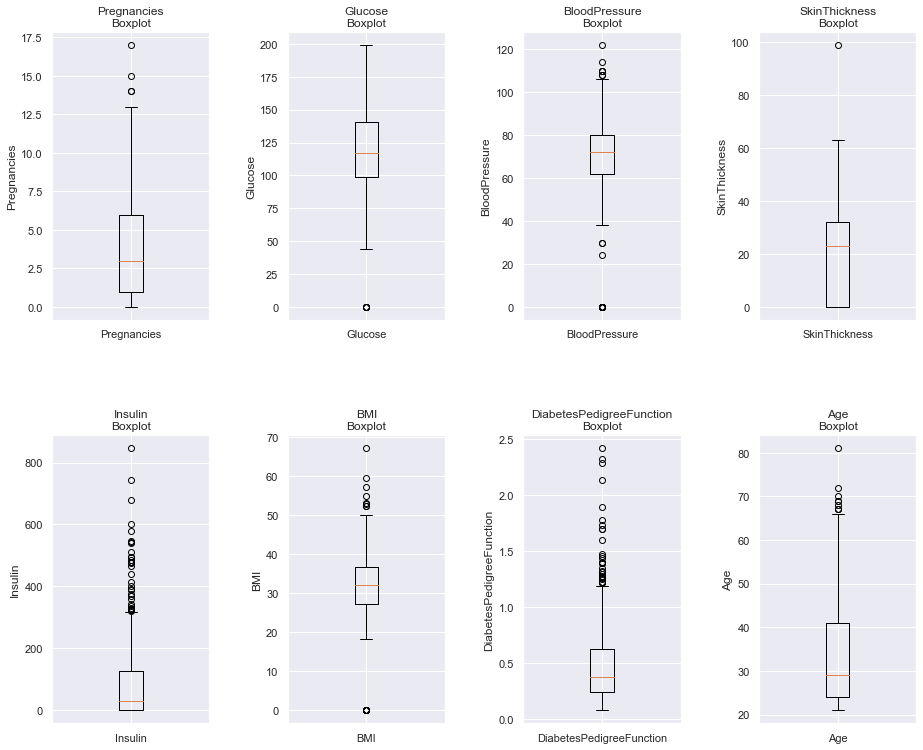

In [158]:
# Distribution of Each Feature: Boxplot
colnames = df.columns

fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(15,12))
for i in range(4):
    x = colnames[i]
    ax[0,i].boxplot(df[str(x)], labels=[str(x)])
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nBoxplot")

for i in range(4,8):
    x = colnames[i]
    ax[1,i-4].boxplot(df[str(x)], labels=[str(x)])
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nBoxplot")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

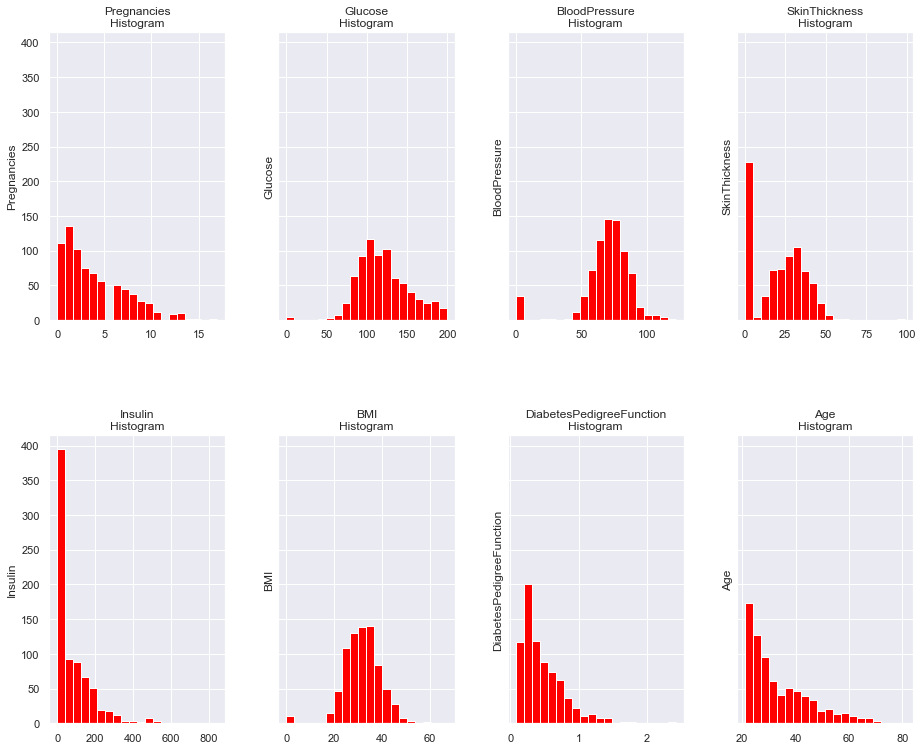

In [396]:
# Distribution of Each Feature: Histogram

fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(15,12), sharey=True)
for i in range(4):
    x = colnames[i]
    ax[0,i].hist(df[str(x)], color="red", bins=20)
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nHistogram")

for i in range(4,8):
    x = colnames[i]
    ax[1,i-4].hist(df[str(x)], color="red", bins=20)
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nHistogram")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

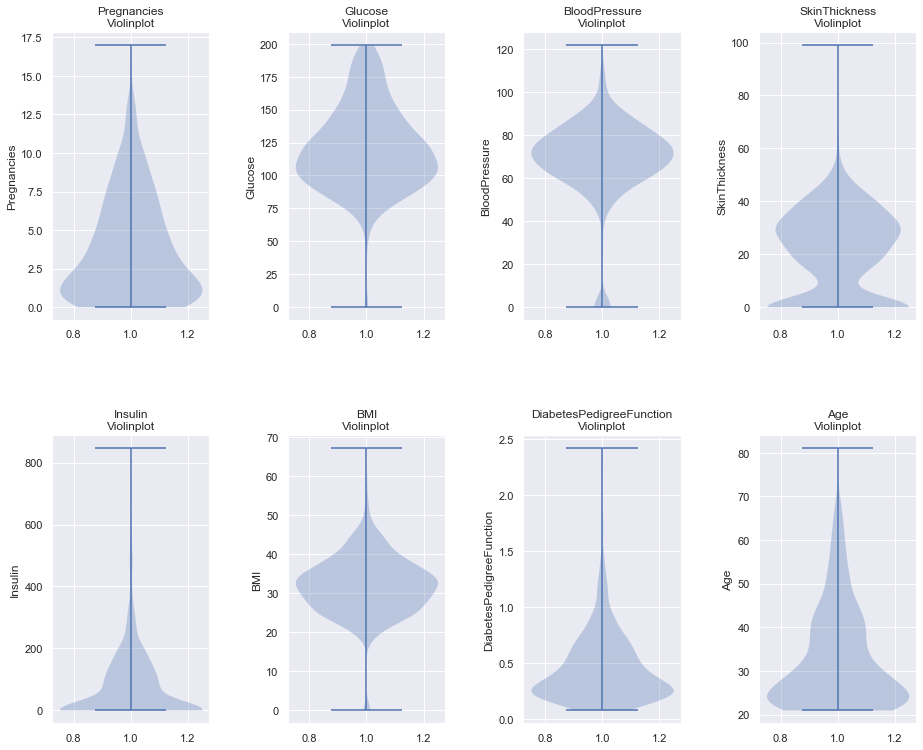

In [161]:
# Distribution of Each Feature: Violinplot

fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(15,12))
for i in range(4):
    x = colnames[i]
    ax[0,i].violinplot(df[str(x)])
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nViolinplot")

for i in range(4,8):
    x = colnames[i]
    ax[1,i-4].violinplot(df[str(x)])
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nViolinplot")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

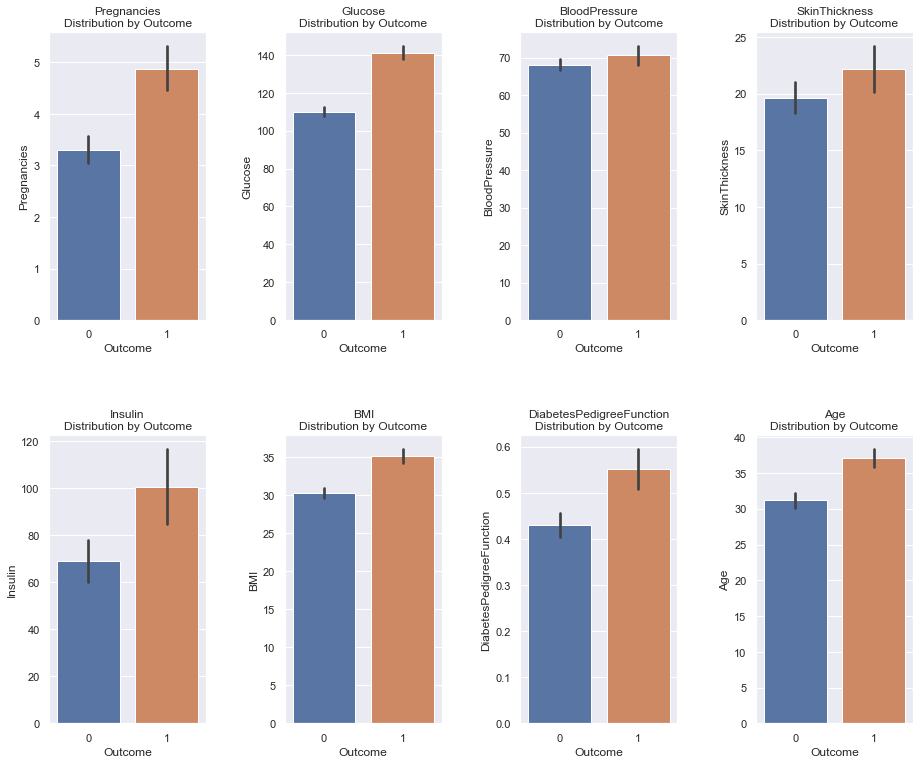

In [166]:
# Distribution of Each Feature By Outcome: Barplot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.barplot(data=df, y=str(x), x="Outcome", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.barplot(data=df, y=str(x), x="Outcome", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

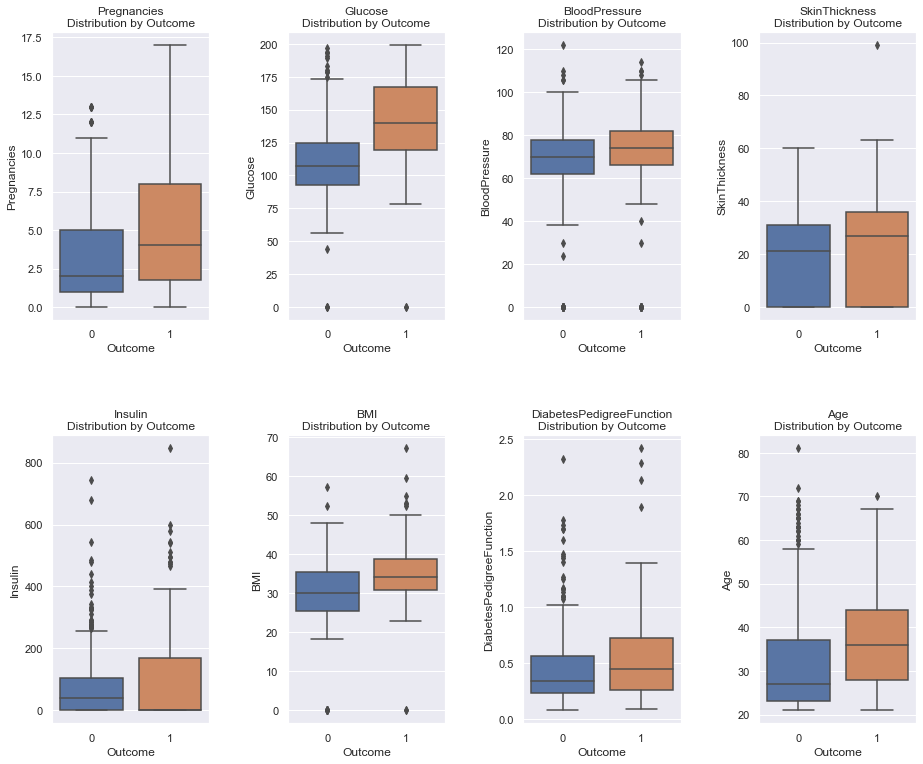

In [167]:
# Distribution of Each Feature By Outcome: Boxplot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.boxplot(data=df, y=str(x), x="Outcome", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.boxplot(data=df, y=str(x), x="Outcome", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

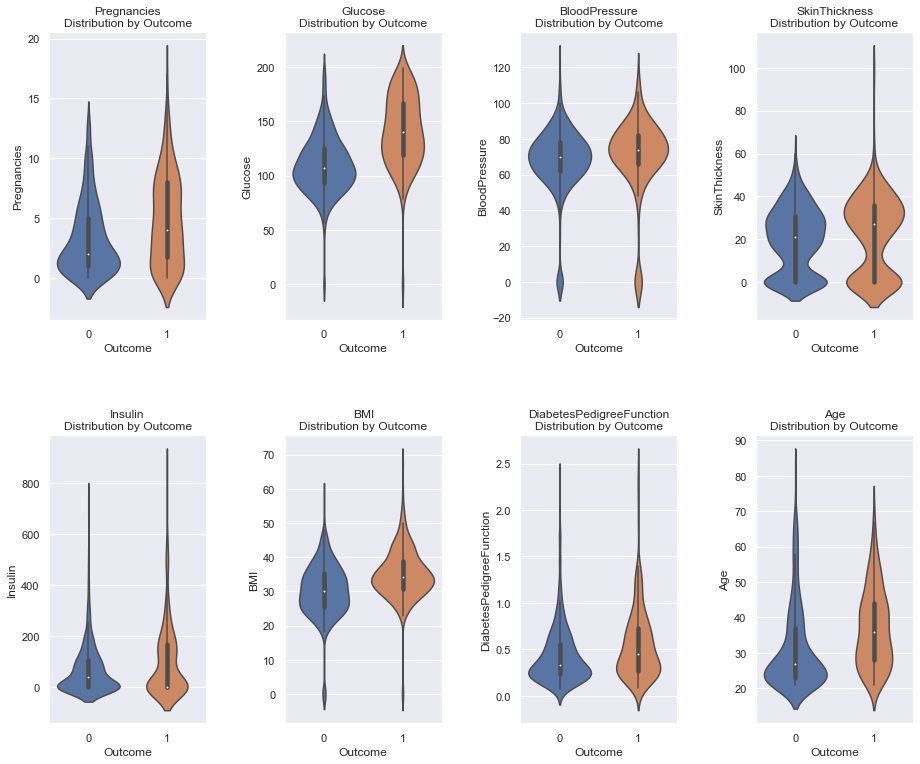

In [168]:
# Distribution of Each Feature By Outcome: Violinplot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.violinplot(data=df, y=str(x), x="Outcome", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.violinplot(data=df, y=str(x), x="Outcome", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

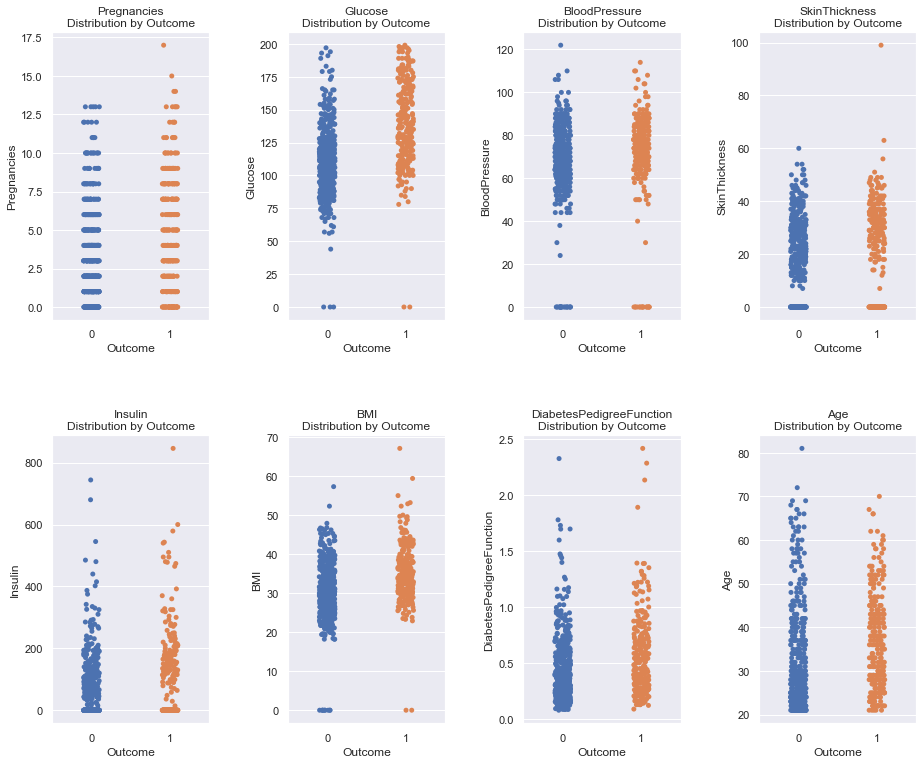

In [171]:
# Distribution of Each Feature By Outcome: Stripplot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.stripplot(data=df, y=str(x), x="Outcome", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.stripplot(data=df, y=str(x), x="Outcome", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

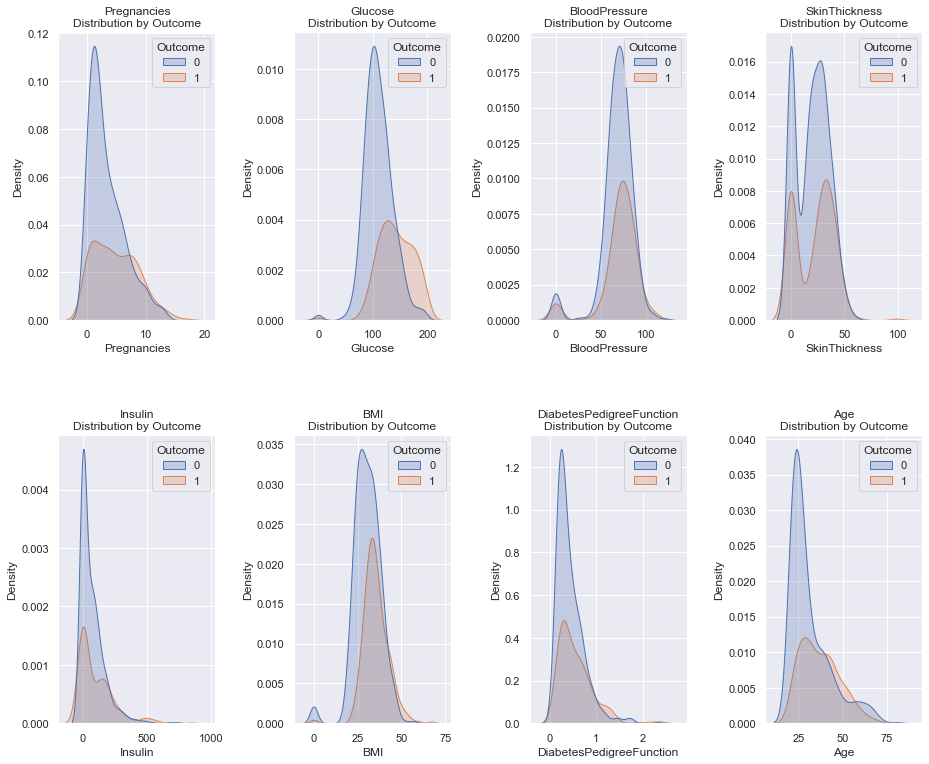

In [162]:
# Distribution of Each Feature By Outcome: Density plot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.kdeplot(data=df, x=str(x), hue="Outcome", shade=True, ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.kdeplot(data=df, x=str(x), hue="Outcome", shade=True, ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

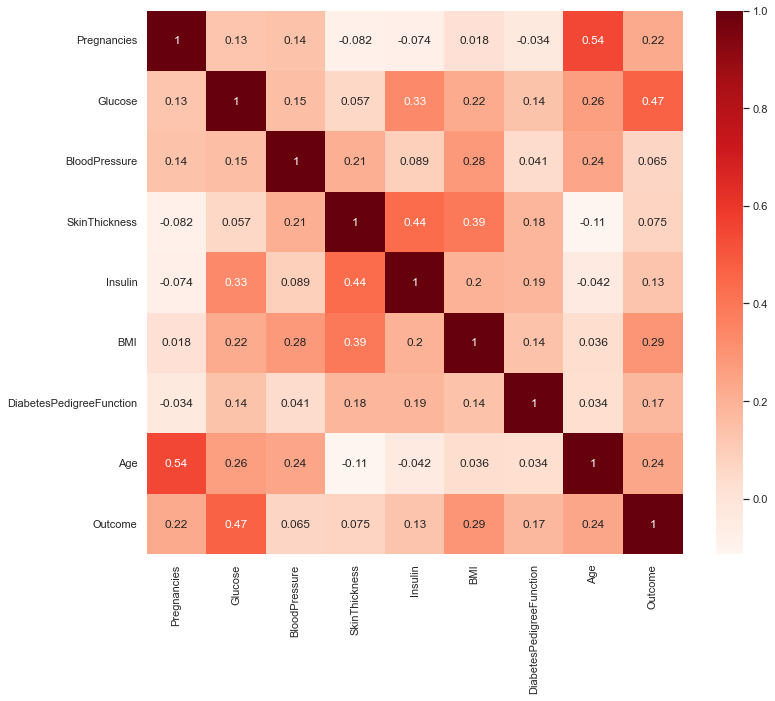

In [311]:
#Using Pearson Correlation to create Correlation heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

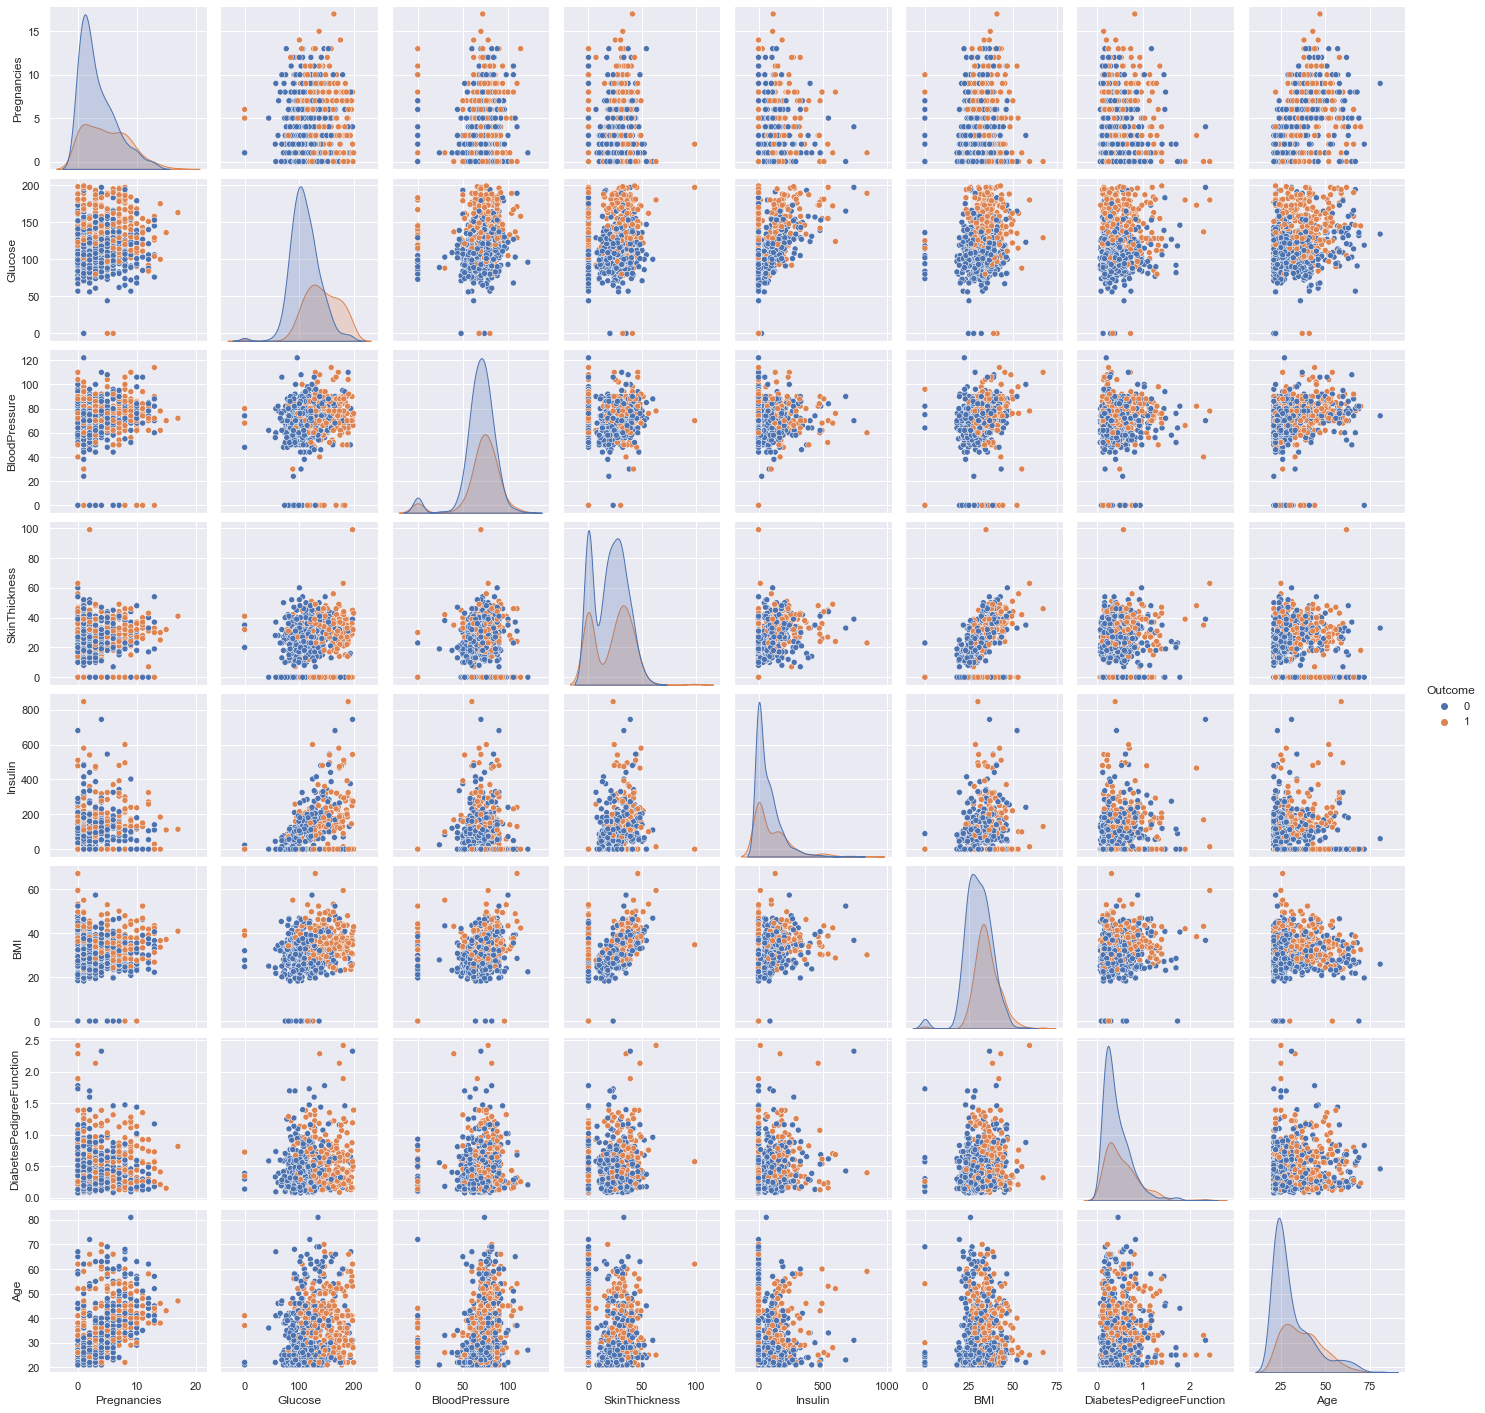

In [118]:
# Pairwise Plotting
# Principal Diagonal Plots- Univaraite Analysis (Density plots) coloured by Outcome
# Other Plots: Bivariate Analysis (Scatter plots) coloured by Outcome
sns.pairplot(data=df, hue="Outcome")

## III) Prediction Models: Supervised

**Note:** True Positive Rate/recall and False Negative Rate specially relevant in models built for disease prediction as the risk of a diabetic person being misclassified as healthy is more important than the risk of a healthy person being misclassified as diabetic. Thus, our main metric would be Recall.

### 1) KNN Classifier (Stratified Hold Out Validation)

In [353]:
#Importing Necessary Packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [365]:
#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

#Scale x
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

#Split test and train, and validation
from sklearn.model_selection import train_test_split
itrain_x, test_x, itrain_y, test_y=train_test_split(x, y, random_state=56, stratify=y, test_size=0.1)
train_x, valid_x, train_y, valid_y=train_test_split(itrain_x, itrain_y, random_state=56, stratify=itrain_y, test_size=1/9)
print(train_x.shape[0]/x.shape[0], valid_x.shape[0]/x.shape[0], test_x.shape[0]/x.shape[0])

0.7994791666666666 0.10026041666666667 0.10026041666666667


In [366]:
#Implement knn classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#KNN Classifier for some random k=3 without validation:
clf=KNN(n_neighbors=10)
clf.fit(itrain_x, itrain_y)
test_predict=clf.predict(test_x)
print("Recall:", recall_score(test_y, test_predict), 
      "\nF1 Score:", f1_score(test_y, test_predict), 
      "\nAccuracy:", accuracy_score(test_y, test_predict))

Recall: 0.4444444444444444 
F1 Score: 0.5106382978723405 
Accuracy: 0.7012987012987013


Text(0.5, 1.0, 'Elbow Curve for KNN Classifier')

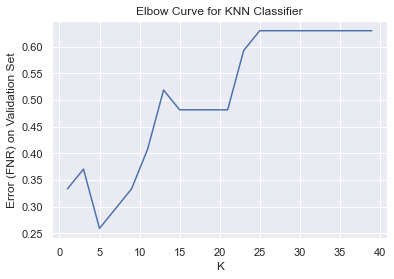

In [367]:
#Elbow Curve (Thresholding) for optimising k
def Elbow(K):
    clf=KNN(n_neighbors=K)
    clf.fit(train_x, train_y)
    valid_predict=clf.predict(valid_x)
    rec=recall_score(valid_y, valid_predict)
    return 1-rec
       

k=list(range(1, 40, 2))
er=list(map(Elbow, k))
plt.plot(k, er)
plt.xlabel("K")
plt.ylabel("Error (FNR) on Validation Set")
plt.title("Elbow Curve for KNN Classifier")

In [368]:
#KNN Classifier on Optimum k:
clf=KNN(n_neighbors=k[er.index(min(er))])
clf.fit(itrain_x, itrain_y)
test_predict=clf.predict(test_x)
print("Recall:", recall_score(test_y, test_predict), 
    "\nF1 Score:", f1_score(test_y, test_predict), 
    "\nAccuracy:", accuracy_score(test_y, test_predict))


Recall: 0.6296296296296297 
F1 Score: 0.6296296296296297 
Accuracy: 0.7402597402597403


Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.63      0.63        27
           0       0.80      0.80      0.80        50

    accuracy                           0.74        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.74      0.74      0.74        77



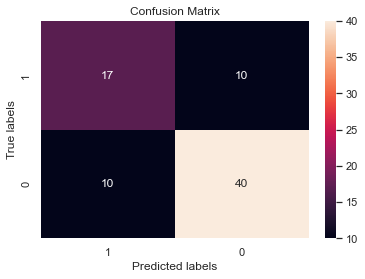

In [369]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict, labels=[1,0])
print('Classification report : \n',matrix)

True Positive Rate/Recall (0.63) and False Negative Rate is (0.37) are specially relevant in models built for disease prediction as the risk of a diabetic person being misclassified as healthy is more important than the risk of a healthy person being misclassified as diabetic.

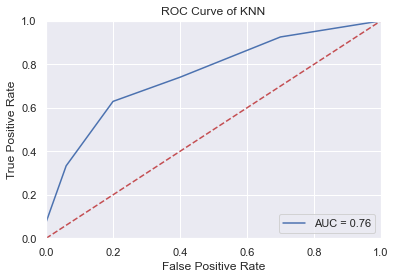

In [370]:
#KNN ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf=KNN(n_neighbors=5)
clf.fit(itrain_x, itrain_y)
test_scores = clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

### 2) KNN Classifier (Using k-Fold Cross Validation)

Text(0, 0.5, 'STD_Score_Metric')

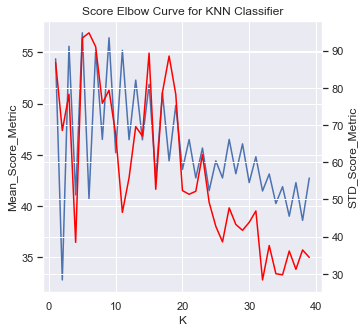

In [265]:
#Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

#Scale x
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

#Split test and train
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(x, y, random_state=56, stratify=y, test_size=0.1)

#Implement knn classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#7-Fold Cross validation Mean Score Elbow Curve (Thresholding)  for optimising k
def Elbow_cross_val_mean(K):
    score=cross_val_score(KNN(n_neighbors=K), X=train_x, y=train_y, cv=7, scoring='recall')
    return score.mean()*100

#7-Fold Cross validation STD score Elbow Curve (Thresholding) for optimising k
def Elbow_cross_val_std(K):
    score=cross_val_score(KNN(n_neighbors=K), X=train_x, y=train_y, cv=7, scoring='recall')
    return score.std()*1000

#The Elbow Curve Plot
k=list(range(1, 40, 1))
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(k, list(map(Elbow_cross_val_mean, k)))
ax.set_xlabel("K")
ax.set_ylabel("Mean_Score_Metric")
ax.set_title("Score Elbow Curve for KNN Classifier")
ax2=ax.twinx()
ax2.plot(k, list(map(Elbow_cross_val_std, k)), color="red")
ax2.set_ylabel("STD_Score_Metric")

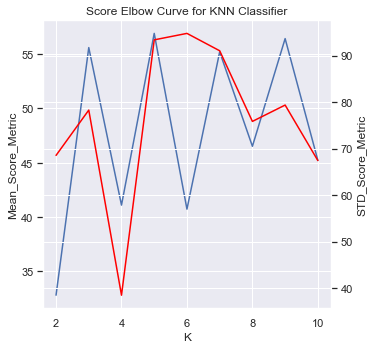

In [266]:
#Zoomed:
#The Elbow Curve Plot
k=list(range(1, 40, 1))
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(k[1:10], list(map(Elbow_cross_val_mean, k))[1:10])
ax.set_xlabel("K")
ax.set_ylabel("Mean_Score_Metric")
ax.set_title("Score Elbow Curve for KNN Classifier")
ax2=ax.twinx()
ax2.plot(k[1:10], list(map(Elbow_cross_val_std, k))[1:10], color="red")
ax2.set_ylabel("STD_Score_Metric")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

In [271]:
#Run on optimum k
#KNN Classifier on Optimum k:
clf=KNN(n_neighbors=3)
clf.fit(train_x, train_y)
test_predict_cv=clf.predict(test_x)
print( "Accuracy on Test:", accuracy_score(test_y, test_predict_cv),
      "\nRecall on Test:", recall_score(test_y, test_predict_cv),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_cv))

Accuracy on Test: 0.7792207792207793 
Recall on Test: 0.6666666666666666 
F1 Score on Test: 0.6792452830188679


Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.67      0.68        27
           0       0.82      0.84      0.83        50

    accuracy                           0.78        77
   macro avg       0.76      0.75      0.76        77
weighted avg       0.78      0.78      0.78        77



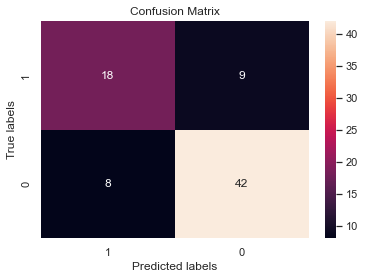

In [288]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_cv, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_cv, labels=[1,0])
print('Classification report : \n',matrix)

True Positive Rate/Recall (0.67) and False Negative Rate is (0.37) are specially relevant in models built for disease prediction as the risk of a diabetic person being misclassified as healthy is more important than the risk of a healthy person being misclassified as diabetic.
For this model, the recall and the precision and consequently the F1 score is more.

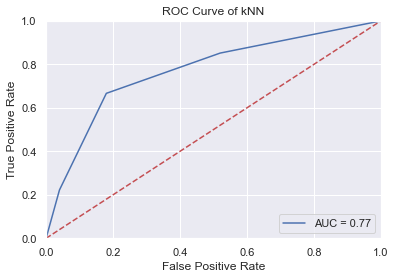

In [306]:
#KNN ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf=KNN(n_neighbors=3)
clf.fit(train_x, train_y)
test_scores = clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

### 3) Multivariate Linear Regression (Stratified Hold Out Validation for Decison Rule)

In [318]:
for i in range(8):
    z=df.iloc[7,i]
    print(type(z))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


Text(0.5, 1.0, 'Elbow Curve for Linear Regressor')

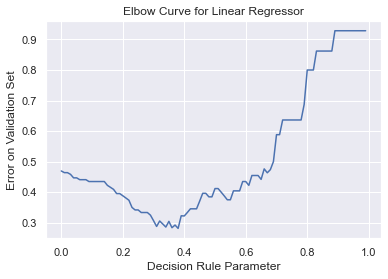

In [420]:
#Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

#Split test and train
itrain_x, test_x, itrain_y, test_y=train_test_split(x, y, random_state=56, stratify=y, test_size=0.1)
train_x, valid_x, train_y, valid_y=train_test_split(itrain_x, itrain_y, random_state=56, stratify=itrain_y, test_size=1/9)

#Implement Linear Regressor
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Creating instance of Logistic Regresssion
lr = LR(normalize=True)

# Fitting the model
lr.fit(train_x, train_y)

# Predicting over the Validation Set
valid_predict = lr.predict(valid_x)

#Decision Rule (By maximising f1 score on the validation set):
er=[]
for i in range(0, 100, 1):
    v=i/100
    def func_dec(x):
        if x >= v:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec, valid_predict))
    er_f1 = 1-f1_score(valid_y, valid_predict_clf)
    er.append(er_f1)
    
i=list(range(0, 100, 1))
v = list(map(lambda x: x/100, i))
plt.plot(v, er)
plt.xlabel("Decision Rule Parameter")
plt.ylabel("Error on Validation Set")
plt.title("Elbow Curve for Linear Regressor")

Regression Coefficients:  [ 0.02022472  0.00573477 -0.00212139  0.00025846 -0.00013437  0.01318029
  0.12281142  0.0026136 ]


Text(0.5, 1.0, 'Coefficient plot')

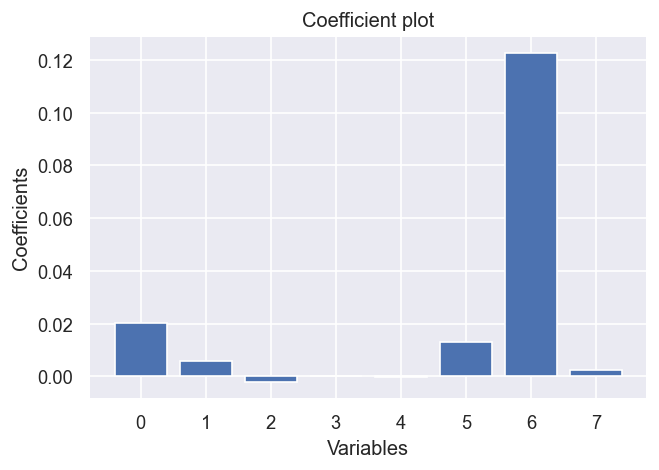

In [421]:
#Using algorithm on entire train (itrain set) set and looking at coefficients
lr = LR()
lr.fit(itrain_x, itrain_y)
test_predict = lr.predict(test_x)

print("Regression Coefficients: ", lr.coef_)

plt.figure(dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [422]:
#Making Final Predictions and evaluating performance

#Using Decision Rule with Optimum Parameter:
def func_dec(x):
    if x >= v[er.index(min(er))]:
        return 1
    else:
        return 0
test_predict_clf=list(map(func_dec, test_predict))

print( "Accuracy on Test:", accuracy_score(test_y, test_predict_clf),
      "\nRecall on Test:", recall_score(test_y, test_predict_clf),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_clf))

Accuracy on Test: 0.8051948051948052 
Recall on Test: 0.8148148148148148 
F1 Score on Test: 0.7457627118644067


Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.81      0.75        27
           0       0.89      0.80      0.84        50

    accuracy                           0.81        77
   macro avg       0.79      0.81      0.79        77
weighted avg       0.82      0.81      0.81        77



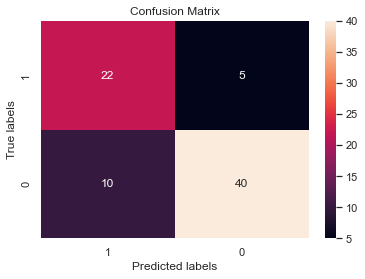

In [416]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_clf, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_clf, labels=[1,0])
print('Classification report : \n',matrix)

True Positive Rate/Recall (0.81) and False Negative Rate is (0.19) are specially relevant in models built for disease prediction as the risk of a diabetic person being misclassified as healthy is more important than the risk of a healthy person being misclassified as diabetic.
For this model, the recall is considerably higher than the knn model.

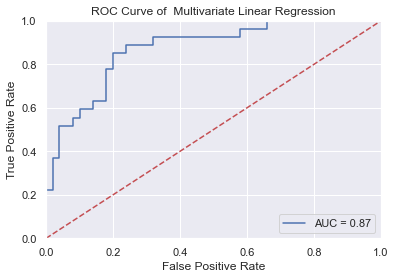

In [373]:
#Linear Regression ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

lr = LR()
lr.fit(itrain_x, itrain_y)
test_scores = lr.predict(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Multivariate Linear Regression')
plt.show()

Problems with this Model:
1. Theshold is shifting with every new data point added.
2. R=There are also negetive values after performing regression, interpreting which as a a probability is abstract. In, other words, it's difficult to interpret the model in the extrememes. 

Therefore, we use logistic regression.

### 4) Logistic Regression

Regression Coefficients:  [[ 1.48659088  4.60559031 -0.56201045  0.2606645   0.02727756  3.14313262
   1.2357822   0.97739223]]


Text(0.5, 1.0, 'Coefficient plot')

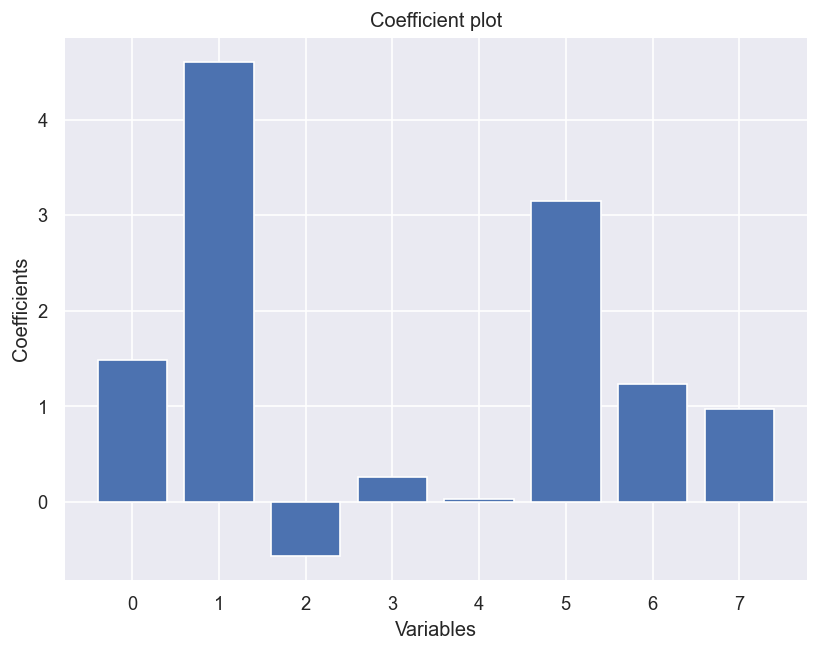

In [402]:
#Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

#Scale x
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

#Split test and train
train_x, test_x, train_y, test_y=train_test_split(x, y, random_state=56, stratify=y, test_size=0.1)

#Implement Logistic Regressor
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

# Predicting over the Test Set
test_predict = logreg.predict(test_x)

#Printing the coefficients
print("Regression Coefficients: ", logreg.coef_)

plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [403]:
#Making Final Predictions and evaluating performance


print( "Accuracy on Test:", accuracy_score(test_y, test_predict),
      "\nRecall on Test:", recall_score(test_y, test_predict),
     "\nF1 Score on Test:", f1_score(test_y, test_predict))

Accuracy on Test: 0.7792207792207793 
Recall on Test: 0.5185185185185185 
F1 Score on Test: 0.6222222222222222


Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.52      0.62        27
           0       0.78      0.92      0.84        50

    accuracy                           0.78        77
   macro avg       0.78      0.72      0.73        77
weighted avg       0.78      0.78      0.77        77



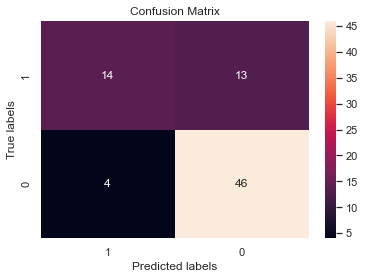

In [404]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict, labels=[1,0])
print('Classification report : \n',matrix)

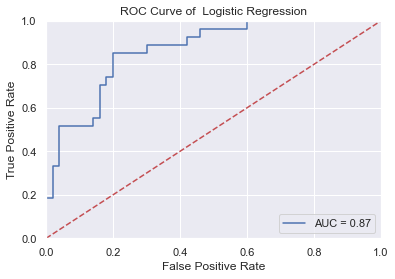

In [395]:
#Logistic Regression ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

lr = LR()
lr.fit(itrain_x, itrain_y)
test_scores = logreg.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Logistic Regression')
plt.show()

### 5) Ridge Regularised Multivariate Linear Regression (Stratified Hold Out Validation for Tuning Decision Parameter and Regularisation Strength)

$$L=\cfrac{1}{n} \sum_{i=1}^n (\hat{Y}_i-Y_i)^2 + \cfrac{\lambda}{n}\sum_{j=1}^m \beta_j^2$$

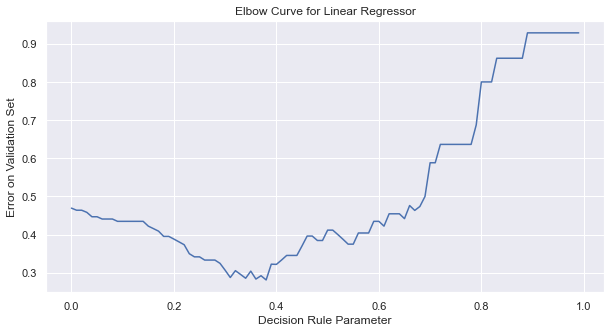

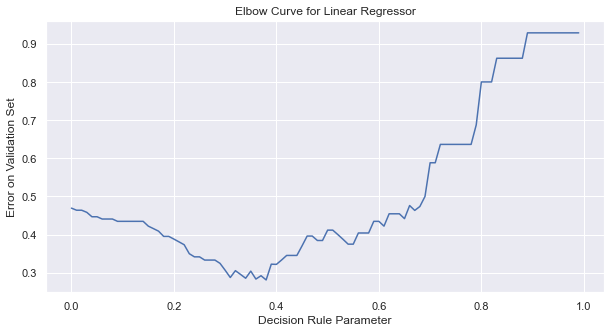

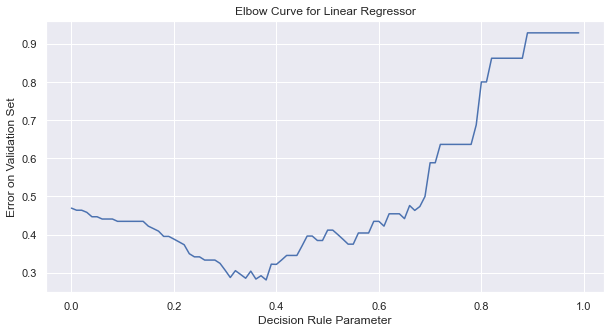

<Figure size 432x288 with 0 Axes>

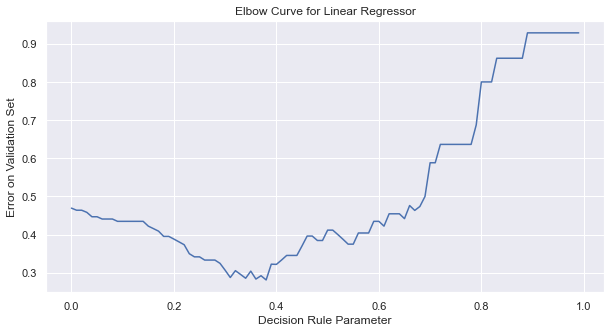

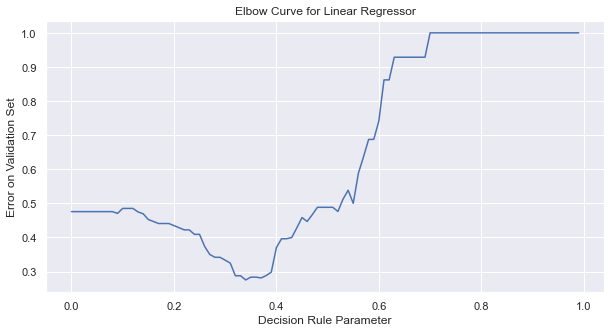

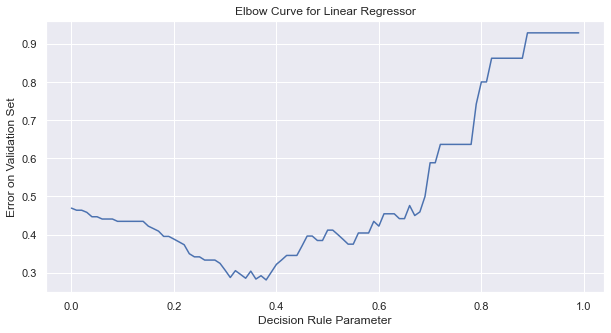

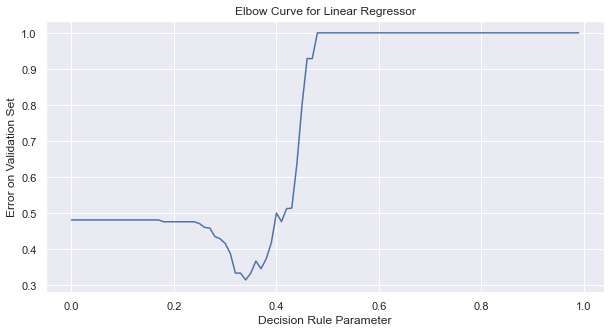

<Figure size 432x288 with 0 Axes>

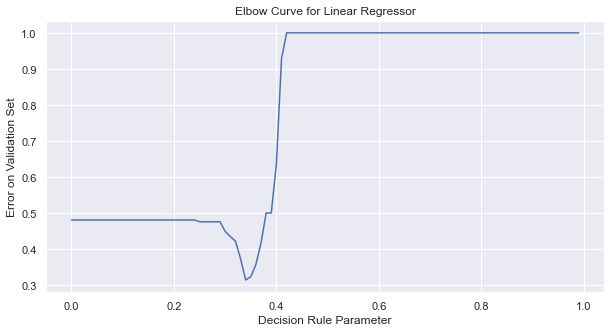

<Figure size 432x288 with 0 Axes>

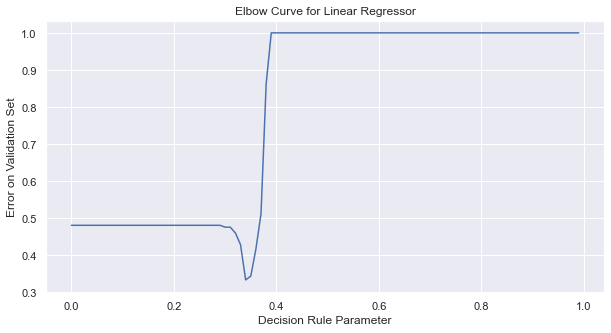

<Figure size 432x288 with 0 Axes>

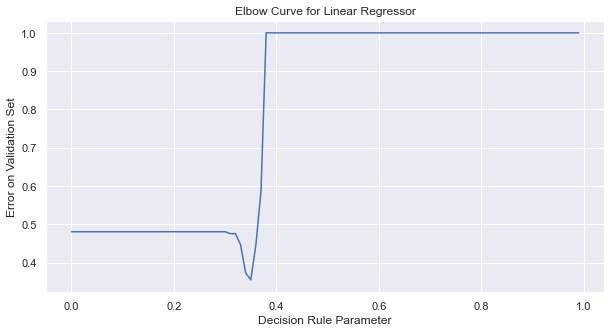

<Figure size 432x288 with 0 Axes>

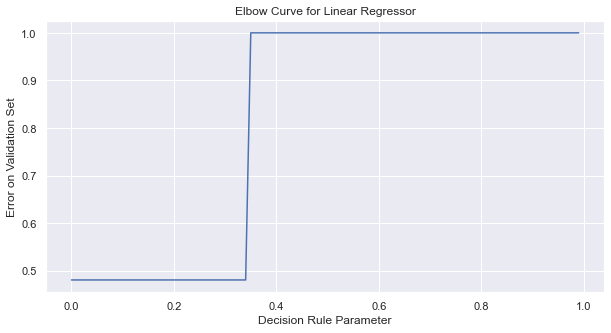

In [436]:
#Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

#Split test and train
itrain_x, test_x, itrain_y, test_y=train_test_split(x, y, random_state=56, stratify=y, test_size=0.1)
train_x, valid_x, train_y, valid_y=train_test_split(itrain_x, itrain_y, random_state=56, stratify=itrain_y, test_size=1/9)

#Implement Ridge Linear Regressor
from sklearn.linear_model import Ridge
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Creating a list of regularisation strength values
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25, 1000]

#Creating empyty lists to store f1 score and recall for ridge regression (with optimal dceision parameter) 
#for each value of alpha:
recall_alpha=[]
f1_alpha=[]

#Running the simulations
def ridge_alpha_max_f1(alpha):
    # Creating instance of Ridge Regresssion
    ridgelr = Ridge(normalize=True, alpha=alpha)
    # Fitting the model
    ridgelr.fit(train_x, train_y)
    # Predicting over the Validation Set
    valid_predict = ridgelr.predict(valid_x)
    #Decision Rule (By maximising f1 score on the validation set):
    er=[]
    for i in range(0, 100, 1):
        v=i/100
        def func_dec(x):
            if x >= v:
                return 1
            else:
                return 0
        valid_predict_clf=list(map(func_dec, valid_predict))
        er_f1 = 1-f1_score(valid_y, valid_predict_clf)
        er.append(er_f1)
    #Using optimum decision parameter
    j=list(range(0, 100, 1))
    v = list(map(lambda x: x/100, j))
    ridgelr = Ridge(alpha=alpha)
    ridgelr.fit(train_x, train_y)
    valid_predict = ridgelr.predict(valid_x)
    def func_dec_opt(x):
        if x >= v[er.index(min(er))]:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec_opt, valid_predict))
    recall_alpha.append(recall_score(valid_y, valid_predict_clf))
    f1_alpha.append(f1_score(valid_y, valid_predict_clf))
    i=list(range(0, 100, 1))
    v = list(map(lambda x: x/100, i))
    f, ax = plt.subplots(figsize=(10, 5))
    ax.plot(v, er)
    plt.xlabel("Decision Rule Parameter")
    plt.ylabel("Error on Validation Set")
    plt.title("Elbow Curve for Linear Regressor")
    
for i in alpha_ridge:
    plt.figure(i)
    ridge_alpha_max_f1(i)


In [444]:
pd.DataFrame({"Alpha":alpha_ridge, "F1":f1_alpha, "Recall":recall_alpha})

,Alpha,F1,Recall
0,0.000000e+00,0.718750,0.851852
1,1.000000e-08,0.718750,0.851852
2,1.000000e-04,0.718750,0.851852
3,1.000000e-03,0.718750,0.851852
4,1.000000e-02,0.718750,0.851852
5,1.000000e+00,0.714286,0.925926
6,5.000000e+00,0.714286,0.925926
7,1.000000e+01,0.714286,0.925926
8,2.000000e+01,0.714286,0.925926
9,2.500000e+01,0.695652,0.888889


Text(0, 0.5, 'Recall Score')

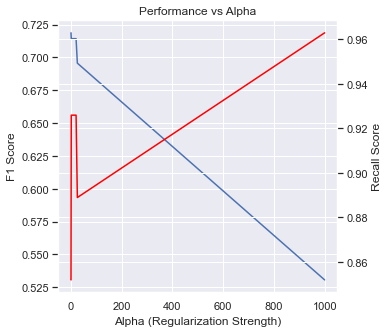

In [438]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(alpha_ridge, f1_alpha)
ax.set_xlabel("Alpha (Regularization Strength)")
ax.set_ylabel("F1 Score")
ax.set_title("Performance vs Alpha")
ax2=ax.twinx()
ax2.plot(alpha_ridge, recall_alpha, color="red")
ax2.set_ylabel("Recall Score")

Text(0, 0.5, 'Recall Score')

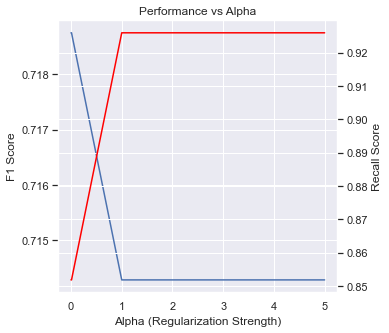

In [445]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(alpha_ridge[0:7], f1_alpha[0:7])
ax.set_xlabel("Alpha (Regularization Strength)")
ax.set_ylabel("F1 Score")
ax.set_title("Performance vs Alpha")
ax2=ax.twinx()
ax2.plot(alpha_ridge[0:7], recall_alpha[0:7], color="red")
ax2.set_ylabel("Recall Score")

Ridge Regression Coefficients:  [ 1.14161291e-02  2.89426216e-03 -2.25891488e-04  3.58595609e-04
  9.07398145e-05  6.92965372e-03  8.13468748e-02  2.79732124e-03]


Text(0.5, 1.0, 'Coefficient plot')

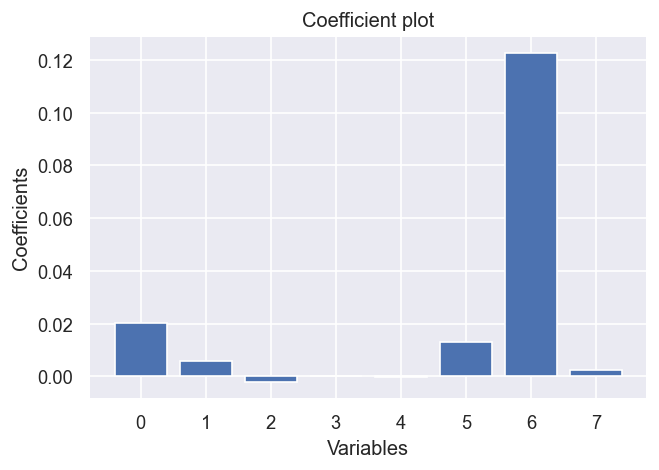

In [452]:
ridgelr = Ridge(normalize=True, alpha=1)
ridgelr.fit(train_x, train_y)
valid_predict = ridgelr.predict(valid_x)
er=[]
for i in range(0, 100, 1):
    v=i/100
    def func_dec(x):
        if x >= v:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec, valid_predict))
    er_f1 = 1-f1_score(valid_y, valid_predict_clf)
    er.append(er_f1)


#Using algorithm on entire train (itrain set) set and looking at coefficients
ridgelr = Ridge(normalize=True, alpha=1)
ridgelr.fit(itrain_x, itrain_y)
test_predict = ridgelr.predict(test_x)

print("Ridge Regression Coefficients: ", ridgelr.coef_)

plt.figure(dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [454]:
#Using Decision Rule with Optimum Parmeter
i=list(range(0, 100, 1))
v = list(map(lambda x: x/100, i))
def func_dec_opt(x):
    if x >= v[er.index(min(er))]:
        return 1
    else:
        return 0
test_predict_clf=list(map(func_dec_opt, test_predict))
print( "Accuracy on Test:", accuracy_score(test_y, test_predict_clf),
      "\nRecall on Test:", recall_score(test_y, test_predict_clf),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_clf))

Accuracy on Test: 0.7532467532467533 
Recall on Test: 0.8518518518518519 
F1 Score on Test: 0.7076923076923076


Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.85      0.71        27
           0       0.90      0.70      0.79        50

    accuracy                           0.75        77
   macro avg       0.75      0.78      0.75        77
weighted avg       0.79      0.75      0.76        77



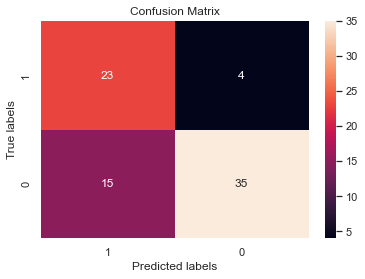

In [455]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_clf, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_clf, labels=[1,0])
print('Classification report : \n',matrix)

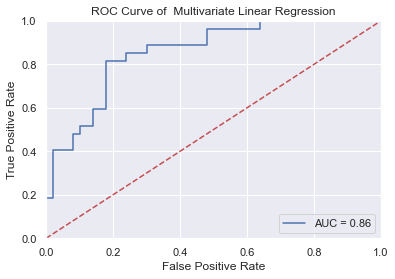

In [456]:
#Ridge Regression ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

ridgelr = Ridge(normalize=True, alpha=1)
ridgelr.fit(itrain_x, itrain_y)
test_scores = ridgelr.predict(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Ridge Linear Regression')
plt.show()

## IV) Comparison of Supervised Models Results

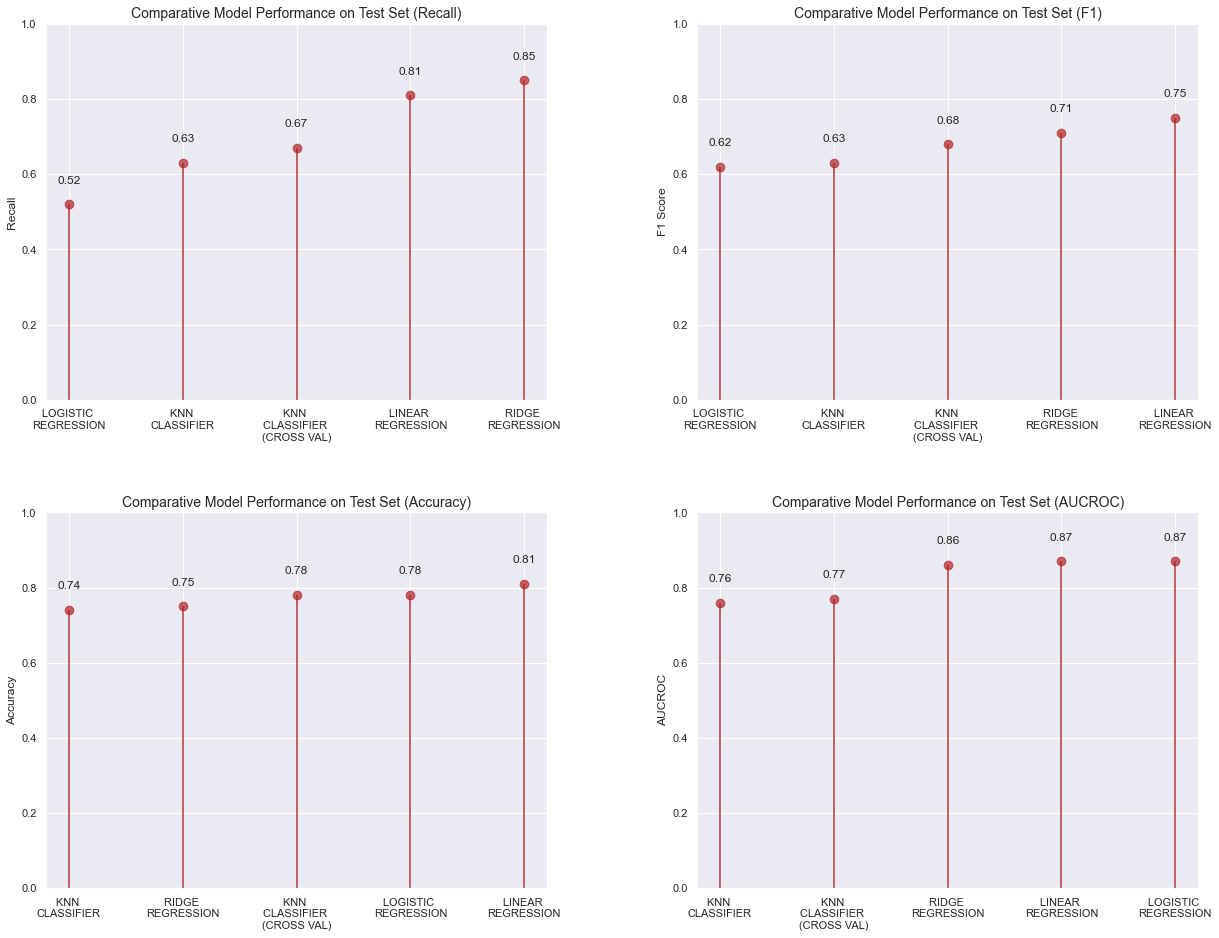

In [935]:
results_x = ["KNN \nClassifier", 
"KNN \nClassifier \n(Cross Val)", 
"Linear \nRegression",
"Logistic \nRegression",
"Ridge \nRegression"]

results_y_Recall = [0.63, 0.67, 0.81, 0.52, 0.85]

results_y_F1 = [0.63, 0.68, 0.75, 0.62, 0.71]

results_y_Accuracy = [0.74, 0.78, 0.81, 0.78, 0.75] 

results_y_AUCROC = [0.76, 0.77, 0.87, 0.87, 0.86]

# Prepare Data
dfa=pd.DataFrame({"Model":results_x, "Recall":results_y_Recall})
dfa.sort_values('Recall', inplace=True)
dfa.reset_index(inplace=True)

dfb=pd.DataFrame({"Model":results_x, "F1":results_y_F1})
dfb.sort_values('F1', inplace=True)
dfb.reset_index(inplace=True)

dfc=pd.DataFrame({"Model":results_x, "Accuracy":results_y_Accuracy})
dfc.sort_values('Accuracy', inplace=True)
dfc.reset_index(inplace=True)

dfd=pd.DataFrame({"Model":results_x, "AUCROC":results_y_AUCROC})
dfd.sort_values('AUCROC', inplace=True)
dfd.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(2,2, figsize=(20,15))

ax[0,0].vlines(x=dfa.index, ymin=0, ymax=dfa.Recall, color='firebrick', alpha=0.7, linewidth=2)
ax[0,0].scatter(x=dfa.index, y=dfa.Recall, s=75, color='firebrick', alpha=0.7)
ax[0,0].set_title('Comparative Model Performance on Test Set (Recall)', fontdict={'size':14})
ax[0,0].set_ylabel('Recall')
ax[0,0].set_xticks(dfa.index)
ax[0,0].set_xticklabels(dfa.Model.str.upper())
ax[0,0].set_ylim(0, 1)
for row in dfa.itertuples():
    ax[0,0].text(row.Index, row.Recall+.05, s=row.Recall, horizontalalignment= 'center', verticalalignment='bottom')
    
ax[0,1].vlines(x=dfb.index, ymin=0, ymax=dfb.F1, color='firebrick', alpha=0.7, linewidth=2)
ax[0,1].scatter(x=dfb.index, y=dfb.F1, s=75, color='firebrick', alpha=0.7)
ax[0,1].set_title('Comparative Model Performance on Test Set (F1)', fontdict={'size':14})
ax[0,1].set_ylabel('F1 Score')
ax[0,1].set_xticks(dfb.index)
ax[0,1].set_xticklabels(dfb.Model.str.upper())
ax[0,1].set_ylim(0, 1)
for row in dfb.itertuples():
    ax[0,1].text(row.Index, row.F1+.05, s=row.F1, horizontalalignment= 'center', verticalalignment='bottom')
    
ax[1,0].vlines(x=dfc.index, ymin=0, ymax=dfc.Accuracy, color='firebrick', alpha=0.7, linewidth=2)
ax[1,0].scatter(x=dfc.index, y=dfc.Accuracy, s=75, color='firebrick', alpha=0.7)
ax[1,0].set_title('Comparative Model Performance on Test Set (Accuracy)', fontdict={'size':14})
ax[1,0].set_ylabel('Accuracy')
ax[1,0].set_xticks(dfa.index)
ax[1,0].set_xticklabels(dfc.Model.str.upper())
ax[1,0].set_ylim(0, 1)
for row in dfc.itertuples():
    ax[1,0].text(row.Index, row.Accuracy+.05, s=row.Accuracy, horizontalalignment= 'center', verticalalignment='bottom')
    
ax[1,1].vlines(x=dfd.index, ymin=0, ymax=dfd.AUCROC, color='firebrick', alpha=0.7, linewidth=2)
ax[1,1].scatter(x=dfd.index, y=dfd.AUCROC, s=75, color='firebrick', alpha=0.7)
ax[1,1].set_title('Comparative Model Performance on Test Set (AUCROC)', fontdict={'size':14})
ax[1,1].set_ylabel('AUCROC')
ax[1,1].set_xticks(dfd.index)
ax[1,1].set_xticklabels(dfd.Model.str.upper())
ax[1,1].set_ylim(0, 1)
for row in dfd.itertuples():
    ax[1,1].text(row.Index, row.AUCROC+.05, s=row.AUCROC, horizontalalignment= 'center', verticalalignment='bottom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

## V) Prediction Models: Unsupervised: K Means Clustering

It doesn't make much sense to split dataset for unsupervised learning since one doesn't have labels to automatically calculate the accuracy/effectiveness of the unsupervised model.

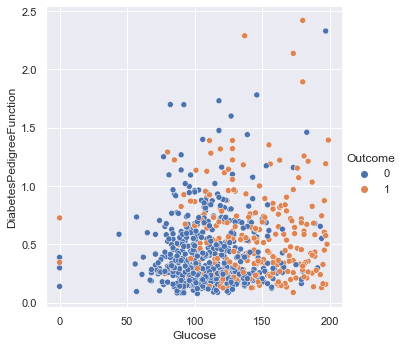

In [469]:
sns.relplot(kind="scatter", data=df, x="Glucose", y="DiabetesPedigreeFunction", hue="Outcome")

In [548]:
#Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

# standardizing the data (Since K Means Clustering is a distance based Algorithm)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

#Implement K Means
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. 
#This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=52)
kmeans.fit(x)

#Looking at the coordinates of the clustre centres
kmeans.cluster_centers_

array([[-0.52576585, -0.23780073, -0.22308335,  0.07839954,  0.01382013,
        -0.06497415, -0.01732699, -0.57562537],
       [ 0.95874949,  0.43363662,  0.40679905, -0.14296386, -0.02520141,
         0.11848227,  0.03159628,  1.04966979]])

In [549]:
# inertia on the fitted data
kmeans.inertia_

5128.730236183139

In [550]:
y_predict = kmeans.predict(x)
print( "Accuracy on Test:", accuracy_score(y, y_predict),
      "\nRecall on Test:", recall_score(y, y_predict),
     "\nF1 Score on Test:", f1_score(y, y_predict))

Accuracy on Test: 0.6744791666666666 
Recall on Test: 0.5410447761194029 
F1 Score on Test: 0.5370370370370371


Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.54      0.54       268
           0       0.75      0.75      0.75       500

    accuracy                           0.67       768
   macro avg       0.64      0.64      0.64       768
weighted avg       0.68      0.67      0.68       768



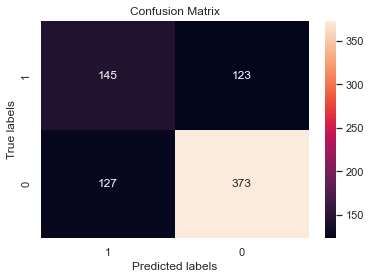

In [551]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(y, y_predict, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y, y_predict, labels=[1,0])
print('Classification report : \n',matrix)

Text(0, 0.5, 'Inertia')

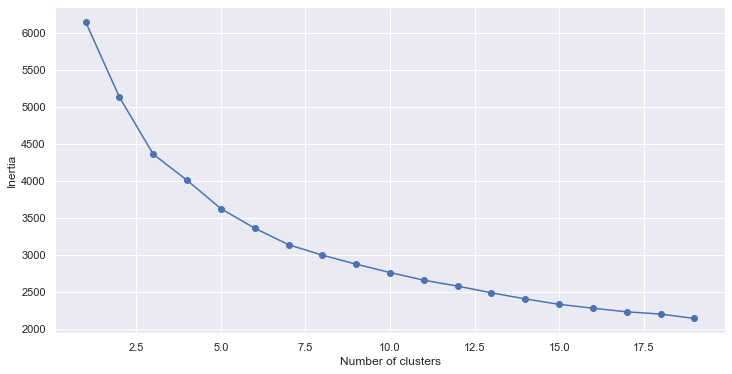

In [552]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++', random_state=52)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### Silhouette Scores

Text(0, 0.5, 'Silhouette Score')

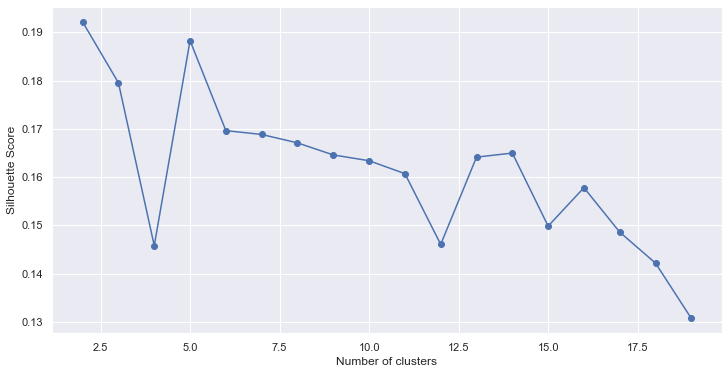

In [802]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

SSo = []
for cluster in range(2,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++', random_state=52)
    kmeans.fit(x)
    labels = kmeans.labels_
    score = metrics.silhouette_score(x, labels, metric='euclidean')
    SSo.append(score)

    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSo})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. The value of the silhouette ranges between -1 and 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A high silhouette score is therefore desirable. 

## VI) Supervised Deep Learning Model: Artificial Neural Network (ANN)

### Untuned ANN

In [803]:
#Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

#Split test and train, and validation
from sklearn.model_selection import train_test_split
itrain_x, test_x, itrain_y, test_y=train_test_split(x, y, random_state=56, stratify=y, test_size=0.1)
train_x, valid_x, train_y, valid_y=train_test_split(itrain_x, itrain_y, random_state=56, stratify=itrain_y, test_size=1/9)


In [804]:
#defining f1 score and recall score metric
import keras.backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

np.random.seed(52)
#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer with 6 neurons
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Second Hidden Layer with 6 neurons
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer with 1 neuron as it's a classification problem.
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=[f1_metric])
#Binary cross entropy is the loss function we use for classification purposes.
#The popular adam optimizer has been used as a trial.

np.random.seed(52)
#Fitting ANN
ann.fit(train_x,train_y,batch_size=128,epochs = 100)
#Used a mini batch gradient descent for trial, 32 is a popular batch size and each training sample will be use 100 times.


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.7300 - f1_metric: 0.0080
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7254 - f1_metric: 0.0089
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7209 - f1_metric: 0.0093
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7164 - f1_metric: 0.0087
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7122 - f1_metric: 0.0167
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7083 - f1_metric: 0.0157
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7045 - f1_metric: 0.0159
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7006 - f1_metric: 0.0241
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6969 - f1_metric: 0.0431
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6933 - f1_metric: 0.0511
Epoch 11/100
5/5 [=

In [ ]:
#ANN Classifier

valid_predict = ann.predict(valid_x)
valid_predict

Text(0.5, 1.0, 'Elbow Curve for ANN')

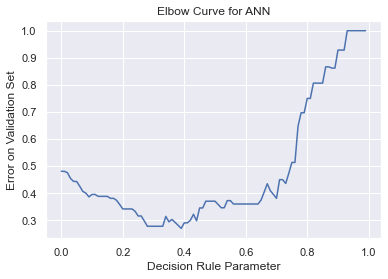

In [805]:
#Decision Rule (By maximising f1 score on the validation set):
er=[]
for i in range(0, 100, 1):
    v=i/100
    def func_dec(x):
        if x >= v:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec, valid_predict))
    er_f1 = 1-f1_score(valid_y, valid_predict_clf)
    er.append(er_f1)
    
i=list(range(0, 100, 1))
v = list(map(lambda x: x/100, i))
plt.plot(v, er)
plt.xlabel("Decision Rule Parameter")
plt.ylabel("Error on Validation Set")
plt.title("Elbow Curve for ANN")

In [806]:
#Making Final Predictions and evaluating performance
np.random.seed(52)
ann.fit(itrain_x,itrain_y,batch_size=128,epochs = 100)
test_predict = ann.predict(test_x)
#Using Decision Rule with Optimum Parameter:
def func_dec_opt(x):
    if x >= v[er.index(min(er))]:
        return 1
    else:
        return 0
test_predict_clf=list(map(func_dec_opt, test_predict))

print( "Accuracy on Test:", accuracy_score(test_y, test_predict_clf),
      "\nRecall on Test:", recall_score(test_y, test_predict_clf),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_clf))

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4646 - f1_metric: 0.6635
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4642 - f1_metric: 0.6599
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4639 - f1_metric: 0.6572
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4633 - f1_metric: 0.6499
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4629 - f1_metric: 0.6596
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4624 - f1_metric: 0.6596
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4620 - f1_metric: 0.6514
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4617 - f1_metric: 0.6638
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4613 - f1_metric: 0.6593
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4611 - f1_metric: 0.6304
Epoch 11/100
6/6 [=

Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.78      0.75        27
           0       0.88      0.84      0.86        50

    accuracy                           0.82        77
   macro avg       0.80      0.81      0.80        77
weighted avg       0.82      0.82      0.82        77



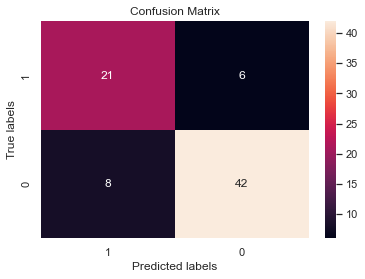

In [807]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_clf, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_clf, labels=[1,0])
print('Classification report : \n',matrix)

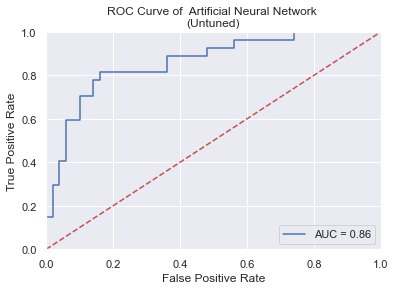

In [808]:
np.random.seed(52)
test_predict = ann.predict(test_x)
#Untuned ANN ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, threshold = roc_curve(test_y, test_predict)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Artificial Neural Network \n(Untuned)')
plt.show()

### ANN Tuning the Hyperparameters:
Hyperparameters that will be tuned:
1. Number of neurons in a layer to choose
2. Choice of the optimization function (optimizer to be used in order to perform stochastic gradient descent)
3. Choice of the learning rate for optimization function (ontrols how much to change the model in response to the estimated error each time the model weights are updated)
4. Choice of activation function (to get the output of the node)
5. Batch Size (number of samples processed before the model is updated)
6. Epoch (number of complete passes through the training dataset.)

In [809]:
#Packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

# Create function
def ann_cl_cv(neurons, activation, optimizer, learning_rate):
    np.random.seed(52)
    optimizerL = ['Adam', 'SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'tanh']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    opt = SGD(lr = learning_rate,  momentum=0.9, clipnorm=0.5)
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=neurons, activation=activation))
    ann.add(tf.keras.layers.Dense(units=neurons, activation=activation))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_metric])
    return ann

ann = KerasClassifier(build_fn=ann_cl_cv, verbose=0)

# Set paramaters
params_ann ={
    'neurons': (6, 12),
    'activation':(0, 1, 2),
    'optimizer':(0,1),
    'learning_rate':(0.02, 1),
    'batch_size':(32, 128),
    'epochs':(100, 500)
}

grid = GridSearchCV(estimator=ann, param_grid = params_ann, scoring='f1', cv=5)

In [810]:
np.random.seed(52)
grid_result = grid.fit(itrain_x, itrain_y)

In [811]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.613365 (0.050435) with: {'activation': 0, 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.02, 'neurons': 6, 'optimizer': 0}
0.579737 (0.093629) with: {'activation': 0, 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.02, 'neurons': 6, 'optimizer': 1}
0.595590 (0.078299) with: {'activation': 0, 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.02, 'neurons': 12, 'optimizer': 0}
0.619550 (0.040948) with: {'activation': 0, 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.02, 'neurons': 12, 'optimizer': 1}
0.110995 (0.221990) with: {'activation': 0, 'batch_size': 32, 'epochs': 100, 'learning_rate': 1, 'neurons': 6, 'optimizer': 0}
0.000000 (0.000000) with: {'activation': 0, 'batch_size': 32, 'epochs': 100, 'learning_rate': 1, 'neurons': 6, 'optimizer': 1}
0.000000 (0.000000) with: {'activation': 0, 'batch_size': 32, 'epochs': 100, 'learning_rate': 1, 'neurons': 12, 'optimizer': 0}
0.000000 (0.000000) with: {'activation': 0, 'batch_size': 32, 'epochs': 100, 'learning_rate': 1,

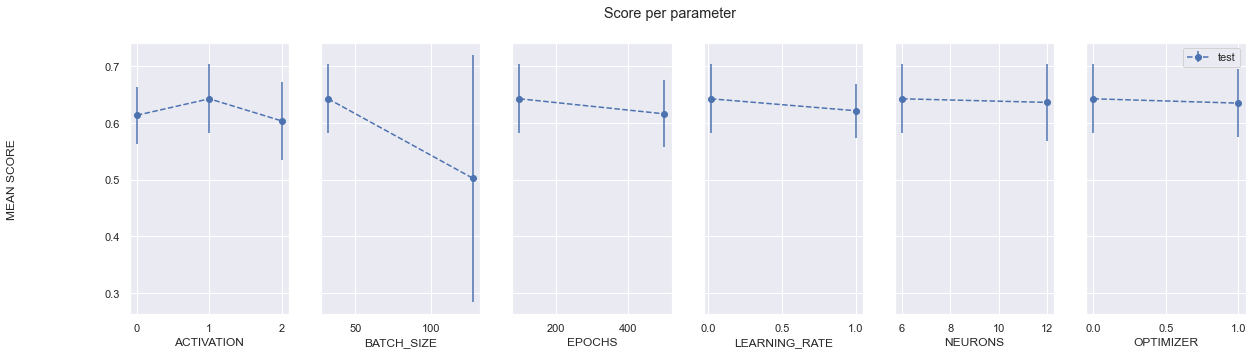

In [812]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid
    
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(grid_result)

In [825]:
# printing the best parameters
print('\n#### Best hyperparamters ####')
grid_result.best_params_


#### Best hyperparamters ####


{'activation': 1,
 'batch_size': 32,
 'epochs': 100,
 'learning_rate': 0.02,
 'neurons': 6,
 'optimizer': 0}

In [826]:
#Running Model with the best hyperparameters:
np.random.seed(52)

#Learning rate for gradient descent
opt = Adam(lr = 0.02)

#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer with 6 neurons
ann.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))

#Adding Second Hidden Layer with 6 neurons
ann.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))

#Adding Output Layer with 1 neuron as it's a classification problem.
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer=opt ,loss="binary_crossentropy",metrics=[f1_metric])

np.random.seed(52)
#Fitting ANN
ann.fit(train_x,train_y,batch_size=32,epochs = 100)


Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7554 - f1_metric: 0.3617
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6216 - f1_metric: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5920 - f1_metric: 0.0196
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5533 - f1_metric: 0.5690
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5127 - f1_metric: 0.5911
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4892 - f1_metric: 0.6559
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4843 - f1_metric: 0.6658
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4775 - f1_metric: 0.6304
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4724 - f1_metric: 0.6590
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4695 - f1_metric: 0.

Text(0.5, 1.0, 'Elbow Curve for ANN')

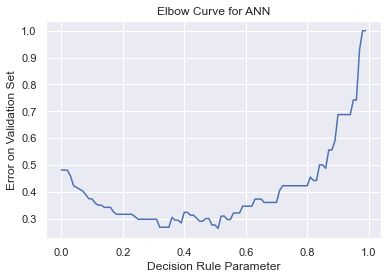

In [827]:
#ANN Classifier

valid_predict = ann.predict(valid_x)

#Decision Rule (By maximising f1 score on the validation set):
er=[]
for i in range(0, 100, 1):
    v=i/100
    def func_dec(x):
        if x >= v:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec, valid_predict))
    er_f1 = 1-f1_score(valid_y, valid_predict_clf)
    er.append(er_f1)
    
i=list(range(0, 100, 1))
v = list(map(lambda x: x/100, i))
plt.plot(v, er)
plt.xlabel("Decision Rule Parameter")
plt.ylabel("Error on Validation Set")
plt.title("Elbow Curve for ANN")

In [828]:
#Making Final Predictions and evaluating performance

np.random.seed(10)
ann.fit(itrain_x,itrain_y,batch_size=32,epochs = 100)

test_predict = ann.predict(test_x)

#Using Decision Rule with Optimum Parameter:
def func_dec_opt(x):
    if x >= v[er.index(min(er))]:
        return 1
    else:
        return 0
test_predict_clf=list(map(func_dec_opt, test_predict))

print( "Accuracy on Test:", accuracy_score(test_y, test_predict_clf),
      "\nRecall on Test:", recall_score(test_y, test_predict_clf),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_clf))

Epoch 1/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4036 - f1_metric: 0.7078
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4010 - f1_metric: 0.7259
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3998 - f1_metric: 0.7086
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3973 - f1_metric: 0.6939
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3979 - f1_metric: 0.7073
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3945 - f1_metric: 0.7251
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3981 - f1_metric: 0.7179
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3954 - f1_metric: 0.7033
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3964 - f1_metric: 0.7304
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3959 - f1_metric: 0.7127

Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.78      0.75        27
           0       0.88      0.84      0.86        50

    accuracy                           0.82        77
   macro avg       0.80      0.81      0.80        77
weighted avg       0.82      0.82      0.82        77



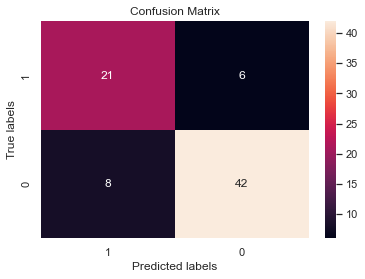

In [829]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_clf, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_clf, labels=[1,0])
print('Classification report : \n',matrix)

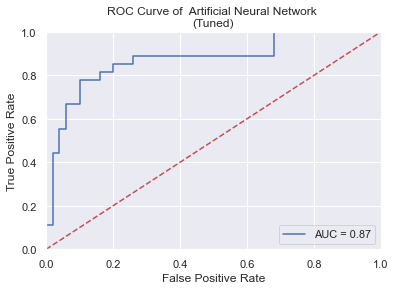

In [830]:
test_predict = ann.predict(test_x)
#Untuned ANN ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, threshold = roc_curve(test_y, test_predict)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Artificial Neural Network \n(Tuned)')
plt.show()

## VII) Principle Component Analysis (Dimension Reduction)

The idea behind PCA is to rotate the coordinate axes, in a such way that axis captures almost all the information content or the variance of highly correlated features. it does so by taking a lower dimensional projection of the irrelevant dimensions from a high dimensional data set with a motive to capture as much information as possible.

In [883]:
#Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

#Performing Feature Scaling (Necessary as PCA requires distance computations which are affected by scale)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

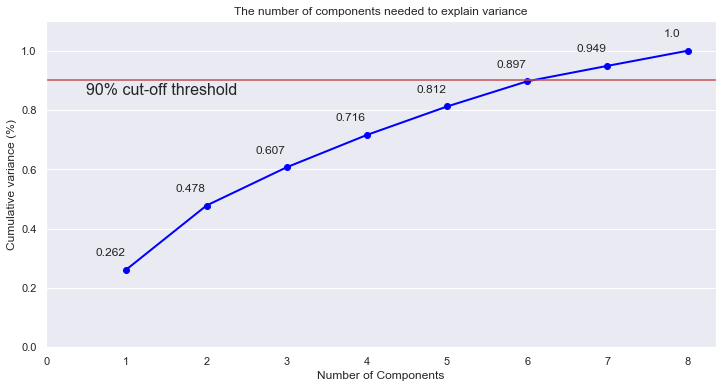

In [884]:
#Looking at the relevant features in our data set.
pca = PCA().fit(x)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 9, step=1)
scree_y = np.cumsum(pca.explained_variance_ratio_)
scree_y=[round(num, 3) for num in scree_y]
dfab=pd.DataFrame({"xi":xi, "scree_y":scree_y})

plt.ylim(0.0,1.1)
plt.plot(dfab.xi, dfab.scree_y, marker='o',  linewidth=2, color='blue')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 9, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', fontsize=16)
for row in dfab.itertuples():
    plt.text(row.Index+0.8, row.scree_y+0.04, s=row.scree_y, horizontalalignment= 'center', verticalalignment='bottom')

ax.grid(axis='x')
plt.show()

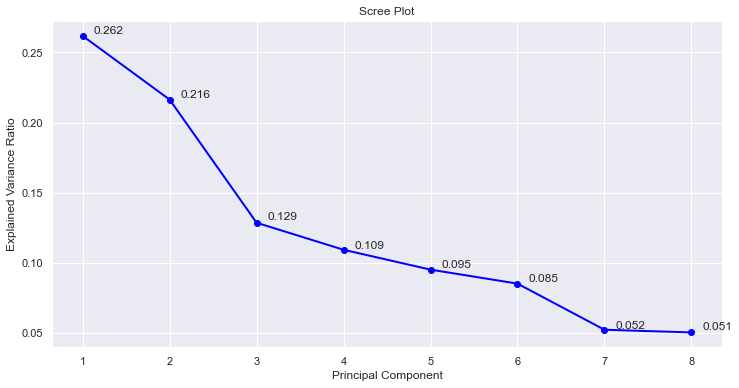

In [890]:
#define PCA model to use
pca = PCA(n_components=8)

#fit PCA model to data
pca_fit = pca.fit_transform(x)

#Scree Plot:
PC_values = np.arange(pca.n_components_) + 1

scree_y=[round(num, 3) for num in pca.explained_variance_ratio_]
dfab=pd.DataFrame({"xi":PC_values, "scree_y":scree_y})

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
for row in dfab.itertuples():
    plt.text(row.Index+1.3, row.scree_y, s=row.scree_y, horizontalalignment= 'center', verticalalignment='bottom')
plt.show()

To explain 90% of the variance, we need 6 of the data set features instead of 8. It's not much of a reduction, but a reductiion still! We shall now set n_components to 6 to reduce our data features from 8 to 6.

#### Capturing 90% of the variance using 6 components:

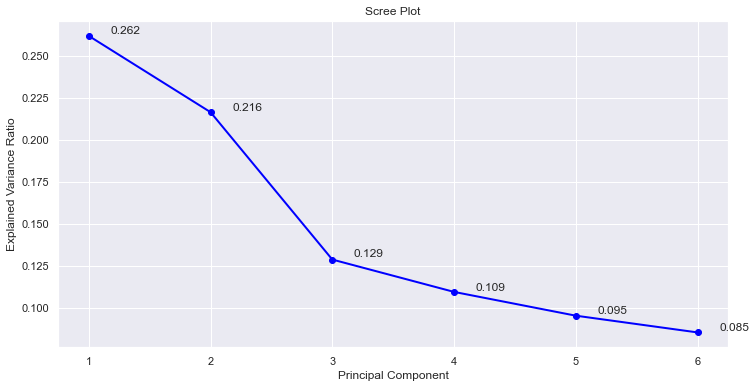

In [891]:
plt.rcParams["figure.figsize"] = (12,6)

#define PCA model to use
pca = PCA(n_components=6)

#fit PCA model to data
pca_fit = pca.fit_transform(x)

#Scree Plot:
PC_values = np.arange(pca.n_components_) + 1

scree_y=[round(num, 3) for num in pca.explained_variance_ratio_]
dfab=pd.DataFrame({"xi":PC_values, "scree_y":scree_y})

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
for row in dfab.itertuples():
    plt.text(row.Index+1.3, row.scree_y, s=row.scree_y, horizontalalignment= 'center', verticalalignment='bottom')
plt.show()

The first principal component explains 26.2% of the total variation in the dataset.  
The second principal component explains 21.6% of the total variation.  
The third principal component explains 12.9% of the total variation.  
The fourth principal component explains 10.9% of the total variation.  
The fifth principal component explains 9.5% of the total variation.  
The sixth principal component explains 8.5% of the total variation.  

In [925]:
# Next, let's create a DataFrame that will have the principal component values for all observations.
pca = PCA(n_components=6)
pca_fit = pca.fit_transform(x)
pcai_df = pd.DataFrame(data = pca_fit
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])
pca_df=pd.concat([pcai_df, y], axis=1)
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,Outcome
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,1
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,1
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,0
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,1


#### Calculating predictions for new pca implemented (6-PCA) set via KNN (Stratified Hold Out Validation) and comparing results with the original data set.

0.7994791666666666 0.10026041666666667 0.10026041666666667


Text(0.5, 1.0, 'Elbow Curve for KNN Classifier in 6-PCA data')

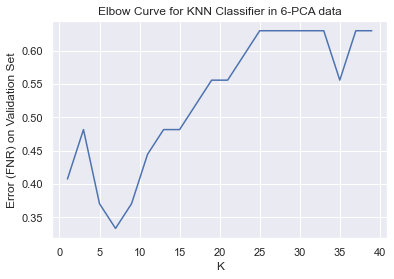

In [926]:
#Importing Necessary Packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")
#Split pca_x and pca_y
pca_x=pca_df.drop(['Outcome'], axis=1)
pca_y=df['Outcome']

#Scale pca_x
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
pca_x_scaled=scaler.fit_transform(pca_x)
pca_x=pd.DataFrame(pca_x_scaled, columns=pca_x.columns)

#Split test and train, and validation
from sklearn.model_selection import train_test_split
itrain_x, test_x, itrain_y, test_y=train_test_split(pca_x, pca_y, random_state=56, stratify=pca_y, test_size=0.1)
train_x, valid_x, train_y, valid_y=train_test_split(itrain_x, itrain_y, random_state=56, stratify=itrain_y, test_size=1/9)
print(train_x.shape[0]/x.shape[0], valid_x.shape[0]/x.shape[0], test_x.shape[0]/x.shape[0])

#Implement knn classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Elbow Curve (Thresholding) for optimising k
def Elbow(K):
    clf=KNN(n_neighbors=K)
    clf.fit(train_x, train_y)
    valid_predict=clf.predict(valid_x)
    rec=recall_score(valid_y, valid_predict)
    return 1-rec

k=list(range(1, 40, 2))
er=list(map(Elbow, k))
plt.plot(k, er)
plt.xlabel("K")
plt.ylabel("Error (FNR) on Validation Set")
plt.title("Elbow Curve for KNN Classifier in 6-PCA data")

In [927]:
#KNN Classifier on Optimum k:
clf=KNN(n_neighbors=k[er.index(min(er))])
clf.fit(itrain_x, itrain_y)
test_predict=clf.predict(test_x)
print("Recall:", recall_score(test_y, test_predict), 
    "\nF1 Score:", f1_score(test_y, test_predict), 
    "\nAccuracy:", accuracy_score(test_y, test_predict))

Recall: 0.5185185185185185 
F1 Score: 0.5833333333333334 
Accuracy: 0.7402597402597403


Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.52      0.58        27
           0       0.77      0.86      0.81        50

    accuracy                           0.74        77
   macro avg       0.72      0.69      0.70        77
weighted avg       0.73      0.74      0.73        77



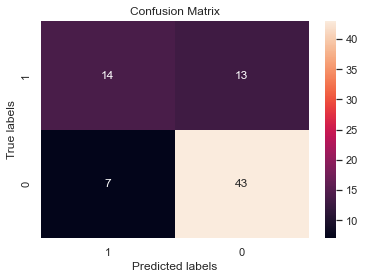

In [928]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict, labels=[1,0])
print('Classification report : \n',matrix)

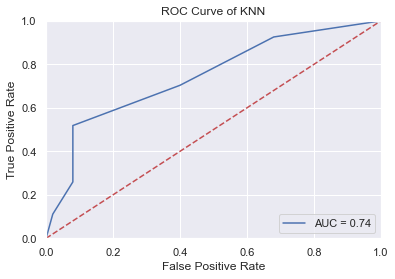

In [929]:
#KNN ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf=KNN(n_neighbors=5)
clf.fit(itrain_x, itrain_y)
test_scores = clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

#### Repeating the above process, but using 7 components intead of 6 to capture 95% variance

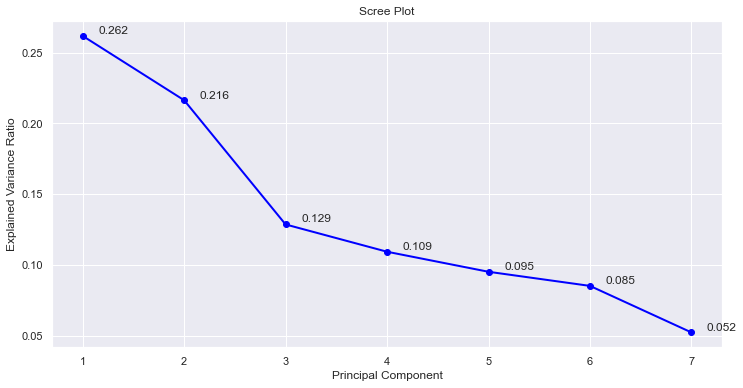

In [911]:
plt.rcParams["figure.figsize"] = (12,6)

#define PCA model to use
pca = PCA(n_components=7)

#fit PCA model to data
pca_fit = pca.fit_transform(x)

#Scree Plot:
PC_values = np.arange(pca.n_components_) + 1

scree_y=[round(num, 3) for num in pca.explained_variance_ratio_]
dfab=pd.DataFrame({"xi":PC_values, "scree_y":scree_y})

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
for row in dfab.itertuples():
    plt.text(row.Index+1.3, row.scree_y, s=row.scree_y, horizontalalignment= 'center', verticalalignment='bottom')
plt.show()

The first principal component explains 26.2% of the total variation in the dataset.  
The second principal component explains 21.6% of the total variation.  
The third principal component explains 12.9% of the total variation.  
The fourth principal component explains 10.9% of the total variation.  
The fifth principal component explains 9.5% of the total variation.  
The sixth principal component explains 8.5% of the total variation.  
The seventh principal component explains 5.2% of the total variation.  

In [920]:
pca = PCA(n_components=7)
pca_fit = pca.fit_transform(x)
pcai_df = pd.DataFrame(data = pca_fit
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])
pca_df=pd.concat([pcai_df, y], axis=1)
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Outcome
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,1
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,0
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,1


#### Calculating predictions for new pca (7 PCA) implemented set via KNN (Stratified Hold Out Validation) and comparing results with the original data set.

0.7994791666666666 0.10026041666666667 0.10026041666666667


Text(0.5, 1.0, 'Elbow Curve for KNN Classifier in 6-PCA data')

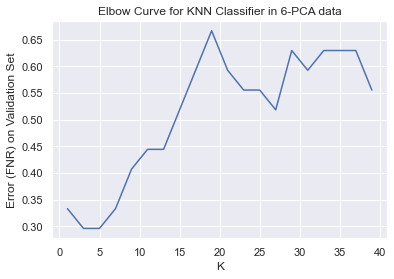

In [921]:
#Importing Necessary Packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")
#Split pca_x and pca_y
pca_x=pca_df.drop(['Outcome'], axis=1)
pca_y=df['Outcome']

#Scale pca_x
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
pca_x_scaled=scaler.fit_transform(pca_x)
pca_x=pd.DataFrame(pca_x_scaled, columns=pca_x.columns)

#Split test and train, and validation
from sklearn.model_selection import train_test_split
itrain_x, test_x, itrain_y, test_y=train_test_split(pca_x, pca_y, random_state=56, stratify=pca_y, test_size=0.1)
train_x, valid_x, train_y, valid_y=train_test_split(itrain_x, itrain_y, random_state=56, stratify=itrain_y, test_size=1/9)
print(train_x.shape[0]/x.shape[0], valid_x.shape[0]/x.shape[0], test_x.shape[0]/x.shape[0])

#Implement knn classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Elbow Curve (Thresholding) for optimising k
def Elbow(K):
    clf=KNN(n_neighbors=K)
    clf.fit(train_x, train_y)
    valid_predict=clf.predict(valid_x)
    rec=recall_score(valid_y, valid_predict)
    return 1-rec

k=list(range(1, 40, 2))
er=list(map(Elbow, k))
plt.plot(k, er)
plt.xlabel("K")
plt.ylabel("Error (FNR) on Validation Set")
plt.title("Elbow Curve for KNN Classifier in 6-PCA data")

In [922]:
#KNN Classifier on Optimum k:
clf=KNN(n_neighbors=k[er.index(min(er))])
clf.fit(itrain_x, itrain_y)
test_predict=clf.predict(test_x)
print("Recall:", recall_score(test_y, test_predict), 
    "\nF1 Score:", f1_score(test_y, test_predict), 
    "\nAccuracy:", accuracy_score(test_y, test_predict))

Recall: 0.6666666666666666 
F1 Score: 0.6923076923076923 
Accuracy: 0.7922077922077922


Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.67      0.69        27
           0       0.83      0.86      0.84        50

    accuracy                           0.79        77
   macro avg       0.77      0.76      0.77        77
weighted avg       0.79      0.79      0.79        77



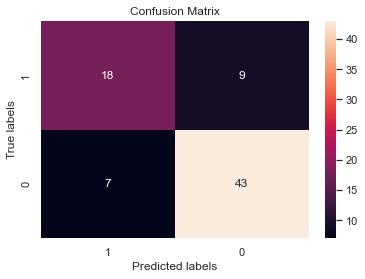

In [923]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict, labels=[1,0])
print('Classification report : \n',matrix)

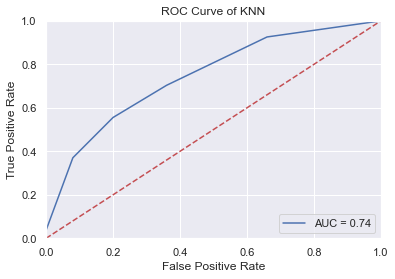

In [924]:
#KNN ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf=KNN(n_neighbors=5)
clf.fit(itrain_x, itrain_y)
test_scores = clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, test_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

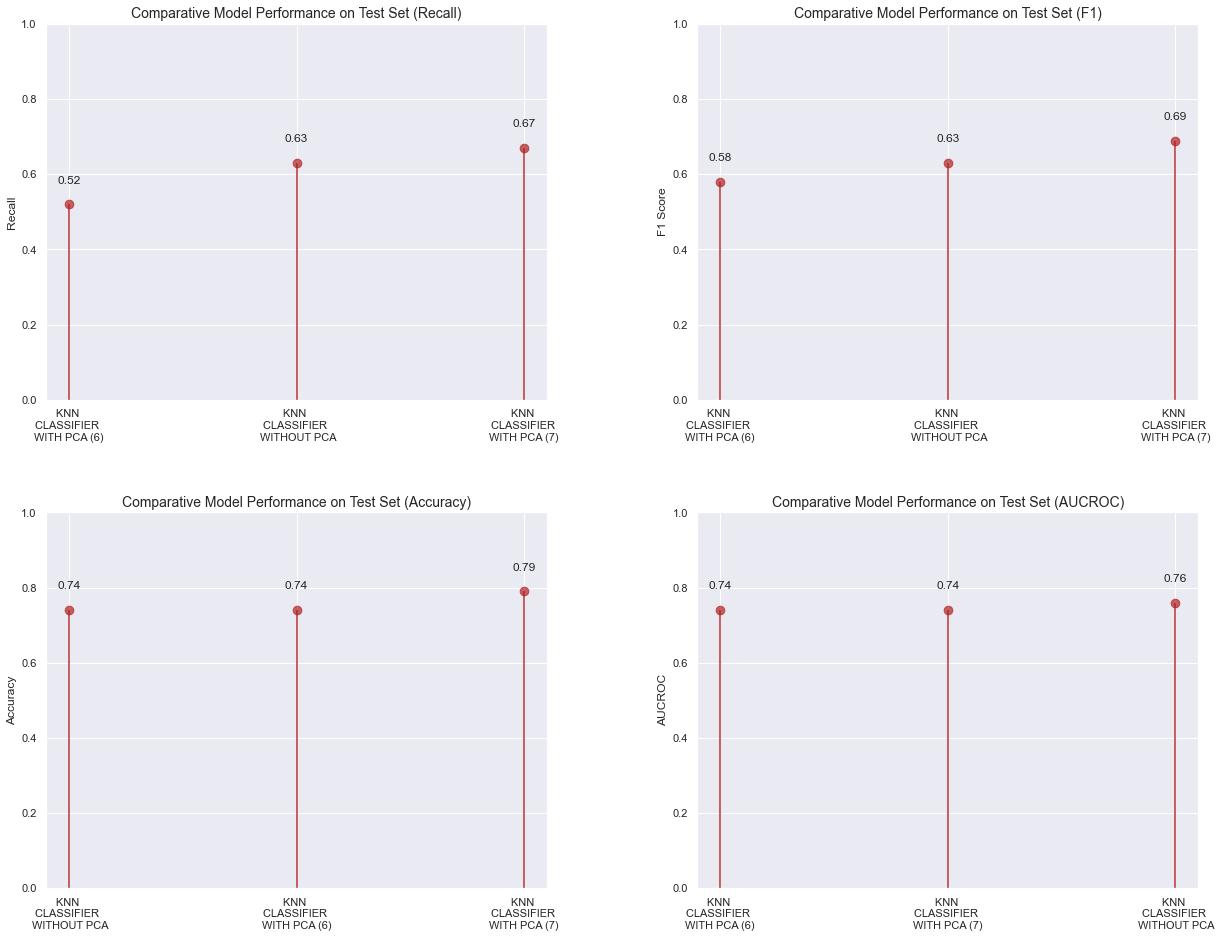

In [936]:
results_x = ["KNN \nClassifier \n Without PCA", 
"KNN \nClassifier \nWith PCA (6)", 
"KNN \nClassifier \nWith PCA (7)"]

results_y_Recall = [0.63, 0.52, 0.67]

results_y_F1 = [0.63, 0.58, 0.69]

results_y_Accuracy = [0.74, 0.74, 0.79] 

results_y_AUCROC = [0.76, 0.74, 0.74]

# Prepare Data
dfa=pd.DataFrame({"Model":results_x, "Recall":results_y_Recall})
dfa.sort_values('Recall', inplace=True)
dfa.reset_index(inplace=True)

dfb=pd.DataFrame({"Model":results_x, "F1":results_y_F1})
dfb.sort_values('F1', inplace=True)
dfb.reset_index(inplace=True)

dfc=pd.DataFrame({"Model":results_x, "Accuracy":results_y_Accuracy})
dfc.sort_values('Accuracy', inplace=True)
dfc.reset_index(inplace=True)

dfd=pd.DataFrame({"Model":results_x, "AUCROC":results_y_AUCROC})
dfd.sort_values('AUCROC', inplace=True)
dfd.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(2,2, figsize=(20,15))

ax[0,0].vlines(x=dfa.index, ymin=0, ymax=dfa.Recall, color='firebrick', alpha=0.7, linewidth=2)
ax[0,0].scatter(x=dfa.index, y=dfa.Recall, s=75, color='firebrick', alpha=0.7)
ax[0,0].set_title('Comparative Model Performance on Test Set (Recall)', fontdict={'size':14})
ax[0,0].set_ylabel('Recall')
ax[0,0].set_xticks(dfa.index)
ax[0,0].set_xticklabels(dfa.Model.str.upper())
ax[0,0].set_ylim(0, 1)
for row in dfa.itertuples():
    ax[0,0].text(row.Index, row.Recall+.05, s=row.Recall, horizontalalignment= 'center', verticalalignment='bottom')
    
ax[0,1].vlines(x=dfb.index, ymin=0, ymax=dfb.F1, color='firebrick', alpha=0.7, linewidth=2)
ax[0,1].scatter(x=dfb.index, y=dfb.F1, s=75, color='firebrick', alpha=0.7)
ax[0,1].set_title('Comparative Model Performance on Test Set (F1)', fontdict={'size':14})
ax[0,1].set_ylabel('F1 Score')
ax[0,1].set_xticks(dfb.index)
ax[0,1].set_xticklabels(dfb.Model.str.upper())
ax[0,1].set_ylim(0, 1)
for row in dfb.itertuples():
    ax[0,1].text(row.Index, row.F1+.05, s=row.F1, horizontalalignment= 'center', verticalalignment='bottom')
    
ax[1,0].vlines(x=dfc.index, ymin=0, ymax=dfc.Accuracy, color='firebrick', alpha=0.7, linewidth=2)
ax[1,0].scatter(x=dfc.index, y=dfc.Accuracy, s=75, color='firebrick', alpha=0.7)
ax[1,0].set_title('Comparative Model Performance on Test Set (Accuracy)', fontdict={'size':14})
ax[1,0].set_ylabel('Accuracy')
ax[1,0].set_xticks(dfa.index)
ax[1,0].set_xticklabels(dfc.Model.str.upper())
ax[1,0].set_ylim(0, 1)
for row in dfc.itertuples():
    ax[1,0].text(row.Index, row.Accuracy+.05, s=row.Accuracy, horizontalalignment= 'center', verticalalignment='bottom')
    
ax[1,1].vlines(x=dfd.index, ymin=0, ymax=dfd.AUCROC, color='firebrick', alpha=0.7, linewidth=2)
ax[1,1].scatter(x=dfd.index, y=dfd.AUCROC, s=75, color='firebrick', alpha=0.7)
ax[1,1].set_title('Comparative Model Performance on Test Set (AUCROC)', fontdict={'size':14})
ax[1,1].set_ylabel('AUCROC')
ax[1,1].set_xticks(dfd.index)
ax[1,1].set_xticklabels(dfd.Model.str.upper())
ax[1,1].set_ylim(0, 1)
for row in dfd.itertuples():
    ax[1,1].text(row.Index, row.AUCROC+.05, s=row.AUCROC, horizontalalignment= 'center', verticalalignment='bottom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)